<font face = "Verdana" size ="5"> The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections.
 
   <br>Coronavirus Case Data is provided by <a href='https://github.com/CSSEGISandData/COVID-19'>Johns Hopkins University</a>
   <br>Mobility data is provided by <a href='https://www.apple.com/covid19/mobility'>Apple</a>
   <br>Learn more from the <a href='https://www.who.int/emergencies/diseases/novel-coronavirus-2019'>WHO</a>
   <br>Learn more from the <a href='https://www.cdc.gov/coronavirus/2019-ncov'>CDC</a>
   <br>Map Visualizations from  <a href='https://gisanddata.maps.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6'>JHU CCSE Dashboard</a>
   
    <br>*Check out my predction model on US states <a href='https://www.kaggle.com/therealcyberlord/multivariable-coronavirus-prediction-for-states'>here</a>
   
   <font face = "Verdana" size ="4">
   <br>Feel free to provide me with feedbacks. 
        <br> Last update: 8/8/2020 2:53 PM ET
    <br><i> New Updates: Coronavirus case update for 8/7. Mobility data update for 8/6. I also published a new kaggle notebook on coronavirus prediction for US states. </i>
   </font>
       <br>
   <font face = "Verdana" size ="4"> *Prediction models are trained from a later starting date (3/13/2020). Therefore, earlier dates might not be accurate. </font>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'>
     Source: https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg </center> 
    </font>
 <font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font>

<br>
<font face = "Verdana" size ="5"> Sections </font>
* <a href='#world_wide_graphs'>Exploring Global Coronavirus Cases</a>
* <a href='#country_graphs'>Exploring Coronavirus Cases From Different Countries</a>
* <a href='#prediction'>Worldwide Confirmed Cases Prediction</a>
* <a href='#data_table'>Data Table</a>
* <a href='#bar_charts'>Pie Charts</a>
* <a href='#pie_charts'>Bar Charts</a>
* <a href='#hospital_testing'>Hospitalization and Testing Data</a>
* <a href='#mobility_data'>Mobility Data for Hotspots</a>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

Import the data (make sure you update this on a daily basis)

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-07-2020.csv')
india_medical_data = pd.read_csv('https://api.covid19india.org/csv/latest/state_wise.csv')
apple_mobility = pd.read_csv('https://covid19-static.cdn-apple.com/covid19-mobility-data/2014HotfixDev6/v3/en-us/applemobilitytrends-2020-08-06.csv')

In [3]:
apple_mobility.head()

geo_type     region transportation_type alternative_name sub-region  \
0  country/region    Albania             driving              NaN        NaN   
1  country/region    Albania             walking              NaN        NaN   
2  country/region  Argentina             driving              NaN        NaN   
3  country/region  Argentina             walking              NaN        NaN   
4  country/region  Australia             driving               AU        NaN   

  country  2020-01-13  2020-01-14  2020-01-15  2020-01-16  ...  2020-07-28  \
0     NaN       100.0       95.30      101.43       97.20  ...      168.26   
1     NaN       100.0      100.68       98.93       98.46  ...      131.60   
2     NaN       100.0       97.07      102.45      111.21  ...       56.84   
3     NaN       100.0       95.11      101.37      112.67  ...       44.63   
4     NaN       100.0      102.98      104.21      108.63  ...       91.46   

   2020-07-29  2020-07-30  2020-07-31  2020-08-01  2020-08-02  2020-08-03  \
0      169.05      176.53      197.01      233.20      229.20      213.40   
1      125.50      121.19      124.26      156.25      137.10      152.20   
2       58.40       59.01       64.67       64.46       37.16       55.03   
3       46.32       46.18       48.13       48.92       31.31       44.05   
4       92.73       98.44      101.88       88.20       87.57       86.67   

   2020-08-04  2020-08-05  2020-08-06  
0      193.56      201.82      187.74  
1      140.26      152.96      144.52  
2       57.82       58.69       57.83  
3       49.23       47.49       43.61  
4       88.74       87.77       92.37  

[5 rows x 213 columns]

In [4]:
latest_data.head()

FIPS     Admin2  Province_State Country_Region          Last_Update  \
0  45001.0  Abbeville  South Carolina             US  2020-08-08 04:34:53   
1  22001.0     Acadia       Louisiana             US  2020-08-08 04:34:53   
2  51001.0   Accomack        Virginia             US  2020-08-08 04:34:53   
3  16001.0        Ada           Idaho             US  2020-08-08 04:34:53   
4  19001.0      Adair            Iowa             US  2020-08-08 04:34:53   

         Lat       Long_  Confirmed  Deaths  Recovered  Active  \
0  34.223334  -82.461707        321       8          0   313.0   
1  30.295065  -92.414197       2570      79          0  2491.0   
2  37.767072  -75.632346       1087      16          0  1071.0   
3  43.452658 -116.241552       8720      76          0  8644.0   
4  41.330756  -94.471059         28       0          0    28.0   

                    Combined_Key  Incidence_Rate  Case-Fatality_Ratio  
0  Abbeville, South Carolina, US     1308.761773             2.492212  
1          Acadia, Louisiana, US     4142.154888             3.073930  
2         Accomack, Virginia, US     3363.658869             1.471941  
3                 Ada, Idaho, US     1810.680106             0.871560  
4                Adair, Iowa, US      391.498881             0.000000

In [5]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  \
0        0        0        0        0  ...    36542    36675   36710   36710   
1        0        0        0        0  ...     5197     5276    5396    5519   
2        0        0        0        0  ...    29831    30394   30950   31465   
3        0        0        0        0  ...      922      925     925     925   
4        0        0        0        0  ...     1109     1148    1164    1199   

   8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  
0   36747   36782   36829   36896   37015   37054  
1    5620    5750    5889    6016    6151    6275  
2   31972   32504   33055   33626   34155   34693  
3     937     939     939     944     955     955  
4    1280    1344    1395    1483    1538    1572  

[5 rows x 204 columns]

In [6]:
india_medical_data.head()

State  Confirmed  Recovered  Deaths  Active    Last_Updated_Time  \
0        Total    2199101    1517079   44051  637507  09/08/2020 20:38:32   
1  Maharashtra     503084     338362   17367  147048  08/08/2020 20:29:36   
2   Tamil Nadu     296901     238638    4927   53336  09/08/2020 19:07:32   
3        Delhi     145427     130587    4111   10729  09/08/2020 17:07:32   
4    Karnataka     178087      93908    3198   80972  09/08/2020 20:17:41   

   Migrated_Other State_code  Delta_Confirmed  Delta_Recovered  Delta_Deaths  \
0             464         TT            47081            37275           598   
1             307         MH                0                0             0   
2               0         TN             5994             6020           119   
3               0         DL             1300             1225            13   
4               9         KA             5985             4670           107   

                                         State_Notes  
0                                                NaN  
1  307 cases are marked as non-covid deaths in MH...  
2  [July 22]: 444 backdated deceased entries adde...  
3  [July 14]: Value for the total tests conducted...  
4                                                NaN

In [7]:
deaths_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  \
0        0        0        0        0  ...     1271     1272    1283    1284   
1        0        0        0        0  ...      154      157     161     166   
2        0        0        0        0  ...     1200     1210    1223    1231   
3        0        0        0        0  ...       52       52      52      52   
4        0        0        0        0  ...       51       52      54      55   

   8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  
0    1288    1288    1294    1298    1307    1312  
1     172     176     182     188     189     193  
2    1239    1248    1261    1273    1282    1293  
3      52      52      52      52      52      52  
4      58      59      62      64      67      70  

[5 rows x 204 columns]

In [8]:
recoveries_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  \
0        0        0        0        0  ...    25471    25509   25509   25510   
1        0        0        0        0  ...     2883     2952    2961    3018   
2        0        0        0        0  ...    20082    20537   20988   21419   
3        0        0        0        0  ...      806      807     807     807   
4        0        0        0        0  ...      395      437     460     461   

   8/3/20  8/4/20  8/5/20  8/6/20  8/7/20  8/8/20  
0   25669   25669   25742   25840   25903   25960  
1    3031    3031    3123    3155    3227    3268  
2   21901   22375   22802   23238   23667   24083  
3     821     825     825     828     839     839  
4     476     503     506     520     544     564  

[5 rows x 204 columns]

In [9]:
cols = confirmed_df.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/30/20', '7/31/20', '8/1/20', '8/2/20', '8/3/20', '8/4/20', '8/5/20',
       '8/6/20', '8/7/20', '8/8/20'],
      dtype='object', length=204)


Get all the dates for the outbreak

In [10]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
confirmed


1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   
264        0        0        0        0        0        0        0        0   
265        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  \
0          0        0  ...    36542    36675   36710   36710   36747   36782   
1          0        0  ...     5197     5276    5396    5519    5620    5750   
2          0        0  ...    29831    30394   30950   31465   31972   32504   
3          0        0  ...      922      925     925     925     937     939   
4          0        0  ...     1109     1148    1164    1199    1280    1344   
..       ...      ...  ...      ...      ...     ...     ...     ...     ...   
261        0        0  ...      870      871     874     874     874     875   
262        0        0  ...     1726     1728    1730    1734    1734    1760   
263        0        0  ...      378      378     386     386     386     388   
264        0        0  ...     7366     7409    7451    7495    7538    7583   
265        0        0  ...      604      604     702     718     718     726   

     8/5/20  8/6/20  8/7/20  8/8/20  
0     36829   36896   37015   37054  
1      5889    6016    6151    6275  
2     33055   33626   34155   34693  
3       939     944     955     955  
4      1395    1483    1538    1572  
..      ...     ...     ...     ...  
261     878     878     878     878  
262    1763    1768    1796    1797  
263     388     396     396     399  
264    7625    7665    7706    7706  
265     726     742     742     742  

[266 rows x 200 columns]

In [11]:
deaths

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   
264        0        0        0        0        0        0        0        0   
265        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  \
0          0        0  ...     1271     1272    1283    1284    1288    1288   
1          0        0  ...      154      157     161     166     172     176   
2          0        0  ...     1200     1210    1223    1231    1239    1248   
3          0        0  ...       52       52      52      52      52      52   
4          0        0  ...       51       52      54      55      58      59   
..       ...      ...  ...      ...      ...     ...     ...     ...     ...   
261        0        0  ...       15       15      15      15      15      15   
262        0        0  ...      487      493     494     497     499     506   
263        0        0  ...        7        7       7       7       7       7   
264        0        0  ...       60       60      60      61      61      61   
265        0        0  ...       13       13      14      19      19      21   

     8/5/20  8/6/20  8/7/20  8/8/20  
0      1294    1298    1307    1312  
1       182     188     189     193  
2      1261    1273    1282    1293  
3        52      52      52      52  
4        62      64      67      70  
..      ...     ...     ...     ...  
261      15      15      15      15  
262     508     508     512     512  
263       7       7       7       7  
264      61      62      62      62  
265      21      23      23      23  

[266 rows x 200 columns]

In [12]:
recoveries

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
248        0        0        0        0        0        0        0        0   
249        0        0        0        0        0        0        0        0   
250        0        0        0        0        0        0        0        0   
251        0        0        0        0        0        0        0        0   
252        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  \
0          0        0  ...    25471    25509   25509   25510   25669   25669   
1          0        0  ...     2883     2952    2961    3018    3031    3031   
2          0        0  ...    20082    20537   20988   21419   21901   22375   
3          0        0  ...      806      807     807     807     821     825   
4          0        0  ...      395      437     460     461     476     503   
..       ...      ...  ...      ...      ...     ...     ...     ...     ...   
248        0        0  ...      771      778     782     787     787     794   
249        0        0  ...      856      862     862     862     863     863   
250        0        0  ...      330      330     330     330     330     340   
251        0        0  ...     6151     6193    6233    6276    6317    6356   
252        0        0  ...      144      144     171     173     173     174   

     8/5/20  8/6/20  8/7/20  8/8/20  
0     25742   25840   25903   25960  
1      3123    3155    3227    3268  
2     22802   23238   23667   24083  
3       825     828     839     839  
4       506     520     544     564  
..      ...     ...     ...     ...  
248     795     797     799     800  
249     894     898     907     910  
250     340     340     353     369  
251    6399    6443    6484    6484  
252     174     175     175     175  

[253 rows x 200 columns]

In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 
russia_cases = [] 
brazil_cases = []
india_cases = []
peru_cases = [] 

china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 
russia_deaths = []
brazil_deaths = [] 
india_deaths = []
peru_deaths = []

china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 
russia_recoveries = [] 
brazil_recoveries = [] 
india_recoveries = [] 
peru_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    russia_cases.append(confirmed_df[confirmed_df['Country/Region']=='Russia'][i].sum())
    brazil_cases.append(confirmed_df[confirmed_df['Country/Region']=='Brazil'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    peru_cases.append(confirmed_df[confirmed_df['Country/Region']=='Peru'][i].sum())
    
    # moving average for case studies 
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    russia_deaths.append(deaths_df[deaths_df['Country/Region']=='Russia'][i].sum())
    brazil_deaths.append(deaths_df[deaths_df['Country/Region']=='Brazil'][i].sum())
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    peru_deaths.append(deaths_df[deaths_df['Country/Region']=='Peru'][i].sum())
    
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    russia_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Russia'][i].sum())
    brazil_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Brazil'][i].sum())
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    peru_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Peru'][i].sum())

In [14]:
china_recoveries

[28,
 30,
 36,
 39,
 49,
 58,
 101,
 120,
 135,
 214,
 275,
 463,
 614,
 843,
 1115,
 1477,
 1999,
 2596,
 3219,
 3918,
 4636,
 5082,
 6217,
 7977,
 9298,
 10755,
 12462,
 14206,
 15962,
 18014,
 18704,
 22699,
 23187,
 25015,
 27676,
 30084,
 32930,
 36329,
 39320,
 42162,
 44854,
 47450,
 50001,
 52292,
 53944,
 55539,
 57388,
 58804,
 60181,
 61644,
 62901,
 64196,
 65660,
 67017,
 67910,
 68798,
 69755,
 70535,
 71266,
 71857,
 72362,
 72814,
 73280,
 73773,
 74181,
 74720,
 75100,
 75582,
 75923,
 76206,
 76405,
 76565,
 76760,
 76946,
 77207,
 77310,
 77410,
 77567,
 77679,
 77791,
 77877,
 77956,
 78039,
 78200,
 78311,
 78401,
 77552,
 77614,
 77690,
 77745,
 77799,
 77861,
 77983,
 78109,
 78175,
 78277,
 78374,
 78422,
 78474,
 78523,
 78573,
 78586,
 78684,
 78792,
 78870,
 78929,
 78977,
 78993,
 79127,
 79167,
 79198,
 79222,
 79246,
 79261,
 79281,
 79293,
 79306,
 79310,
 79310,
 79310,
 79310,
 79332,
 79335,
 79343,
 79352,
 79358,
 79367,
 79371,
 79382,
 79386,
 7938

In [15]:
 confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   
264        0        0        0        0        0        0        0        0   
265        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  7/30/20  7/31/20  8/1/20  8/2/20  8/3/20  8/4/20  \
0          0        0  ...    36542    36675   36710   36710   36747   36782   
1          0        0  ...     5197     5276    5396    5519    5620    5750   
2          0        0  ...    29831    30394   30950   31465   31972   32504   
3          0        0  ...      922      925     925     925     937     939   
4          0        0  ...     1109     1148    1164    1199    1280    1344   
..       ...      ...  ...      ...      ...     ...     ...     ...     ...   
261        0        0  ...      870      871     874     874     874     875   
262        0        0  ...     1726     1728    1730    1734    1734    1760   
263        0        0  ...      378      378     386     386     386     388   
264        0        0  ...     7366     7409    7451    7495    7538    7583   
265        0        0  ...      604      604     702     718     718     726   

     8/5/20  8/6/20  8/7/20  8/8/20  
0     36829   36896   37015   37054  
1      5889    6016    6151    6275  
2     33055   33626   34155   34693  
3       939     944     955     955  
4      1395    1483    1538    1572  
..      ...     ...     ...     ...  
261     878     878     878     878  
262    1763    1768    1796    1797  
263     388     396     396     399  
264    7625    7665    7706    7706  
265     726     742     742     742  

[266 rows x 200 columns]

In [16]:
confirmed_sum

19637506

In [17]:
death_sum

726781

In [18]:
recovered_sum

11939109

In [19]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30802,
 34395,
 37129,
 40159,
 42768,
 44810,
 45228,
 60381,
 66908,
 69050,
 71234,
 73269,
 75151,
 75651,
 76211,
 76840,
 78601,
 78981,
 79545,
 80398,
 81375,
 82739,
 84116,
 86011,
 88395,
 90369,
 92947,
 95246,
 98037,
 101980,
 106018,
 109972,
 113872,
 118896,
 126559,
 132309,
 146716,
 157824,
 168973,
 183640,
 199487,
 219083,
 247002,
 276612,
 308921,
 342341,
 384508,
 425675,
 476494,
 539391,
 603791,
 671447,
 731024,
 795666,
 872076,
 948290,
 1029704,
 1112859,
 1193322,
 1265035,
 1337712,
 1414580,
 1498360,
 1585025,
 1672620,
 1749575,
 1846390,
 1916063,
 1985901,
 2066740,
 2163426,
 2251145,
 2325103,
 2405607,
 2478960,
 2554241,
 2631027,
 2720027,
 2806972,
 2891910,
 2964853,
 3033572,
 3108878,
 3185925,
 3269608,
 3356663,
 3438339,
 3515957,
 3592058,
 3672050,
 3762073,
 3851158,
 3942676,
 4028522,
 4104768,
 4181009,
 4264584,
 4349360

In [20]:
 mortality_rate

[0.03063063063063063,
 0.027522935779816515,
 0.02763018065887354,
 0.029288702928870293,
 0.02644003777148253,
 0.02801503245644004,
 0.023485120114736465,
 0.021569899448589037,
 0.020767549186300704,
 0.021456633423995165,
 0.021515201860774213,
 0.021564305712753917,
 0.021421028812792276,
 0.020587496861662065,
 0.02040299533335745,
 0.020583079020842804,
 0.020904201192033726,
 0.021708098790702686,
 0.022560322717199134,
 0.02368593340815563,
 0.024838205757643384,
 0.024719200495268417,
 0.022705818055348537,
 0.022762599390207448,
 0.024127443881245474,
 0.024847685094196593,
 0.025495093422866422,
 0.02671953799683304,
 0.028063079139733778,
 0.02949705423101652,
 0.0293076522644456,
 0.031284589254589636,
 0.031273344222028085,
 0.033063046074549,
 0.03370730615189432,
 0.03405222734254992,
 0.034010563337724654,
 0.034155214227970895,
 0.03420492727674367,
 0.03389331975790486,
 0.03413781274552114,
 0.03399786975373062,
 0.034174663502929255,
 0.03415037179840264,
 0.03392

In [21]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4266,
 4611,
 4916,
 5413,
 5830,
 6471,
 7151,
 7956,
 8855,
 9962,
 11442,
 13149,
 14850,
 16772,
 19047,
 21828,
 24843,
 28370,
 32069,
 35549,
 39727,
 44602,
 50183,
 56515,
 62522,
 68406,
 73490,
 79393,
 87364,
 94166,
 101872,
 109196,
 115343,
 121153,
 126978,
 133930,
 142302,
 149645,
 158589,
 165120,
 169737,
 175216,
 182420,
 189220,
 196101,
 202812,
 208436,
 212356,
 217047,
 223533,
 230316,
 236306,
 241505,
 246966,
 250444,
 254592,
 260478,
 267052,
 272477,
 278066,
 282340,
 285921,
 289396,
 294953,
 300194,
 305471,
 310706,
 314870,
 318205,
 321502,
 326290,
 331186,
 335983,
 341271,
 345269,
 348415,
 349603,
 353816,
 359038,
 363749,
 368496,


In [22]:
total_recovered

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [23]:
total_active

[510,
 606,
 879,
 1353,
 2010,
 2784,
 5340,
 5907,
 7920,
 9492,
 11495,
 15953,
 18838,
 22554,
 25955,
 28681,
 31665,
 33707,
 36009,
 37809,
 39014,
 38960,
 52715,
 57327,
 57989,
 58599,
 58818,
 58791,
 57407,
 55786,
 55698,
 53256,
 53117,
 51688,
 49783,
 48220,
 46648,
 44532,
 43287,
 42683,
 41682,
 41559,
 40821,
 40893,
 42655,
 44100,
 45475,
 47392,
 50226,
 54946,
 59069,
 71052,
 79372,
 86470,
 98403,
 110693,
 126907,
 152082,
 177767,
 204102,
 229606,
 269385,
 298636,
 340891,
 392403,
 444500,
 499954,
 546584,
 591602,
 649649,
 705189,
 763222,
 824922,
 879084,
 931873,
 982067,
 1027573,
 1075835,
 1129446,
 1187915,
 1232466,
 1304057,
 1340738,
 1378535,
 1414332,
 1472855,
 1525507,
 1569015,
 1613247,
 1659131,
 1692365,
 1731926,
 1785265,
 1815448,
 1866983,
 1907401,
 1943660,
 1979209,
 2007291,
 2020018,
 2063621,
 2098957,
 2140781,
 2178647,
 2216213,
 2253656,
 2297848,
 2347227,
 2375249,
 2414320,
 2440092,
 2481089,
 2504768,
 2556863,
 259

Getting daily increases and moving averages

window size is the range in which the whole data will be distributed. More window size means more smoother and less realistic data.

In [24]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 14

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)
russia_daily_increase = daily_increase(russia_cases)
brazil_daily_increase = daily_increase(brazil_cases)
india_daily_increase = daily_increase(india_cases)
peru_daily_increase = daily_increase(peru_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)

china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)
russia_daily_death = daily_increase(russia_deaths)
brazil_daily_death = daily_increase(brazil_deaths)
india_daily_death = daily_increase(india_deaths)
peru_daily_death = daily_increase(peru_deaths)


# recoveries
world_daily_recovery = daily_increase(total_recovered)
world_recovery_avg = moving_average(total_recovered, window)
world_daily_recovery_avg = moving_average(world_daily_recovery, window)

china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)
russia_daily_recovery = daily_increase(russia_recoveries)
brazil_daily_recovery = daily_increase(brazil_recoveries)
india_daily_recovery = daily_increase(india_recoveries)
peru_daily_recovery = daily_increase(peru_recoveries)

# active 
world_active_avg = moving_average(total_active, window)

In [25]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [26]:
world_cases

array([[     555],
       [     654],
       [     941],
       [    1434],
       [    2118],
       [    2927],
       [    5578],
       [    6166],
       [    8234],
       [    9927],
       [   12038],
       [   16787],
       [   19887],
       [   23898],
       [   27643],
       [   30802],
       [   34395],
       [   37129],
       [   40159],
       [   42768],
       [   44810],
       [   45228],
       [   60381],
       [   66908],
       [   69050],
       [   71234],
       [   73269],
       [   75151],
       [   75651],
       [   76211],
       [   76840],
       [   78601],
       [   78981],
       [   79545],
       [   80398],
       [   81375],
       [   82739],
       [   84116],
       [   86011],
       [   88395],
       [   90369],
       [   92947],
       [   95246],
       [   98037],
       [  101980],
       [  106018],
       [  109972],
       [  113872],
       [  118896],
       [  126559],
       [  132309],
       [  146716],
       [  15

Future forcasting

In [27]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [28]:
future_forcast.size

210

In [29]:
adjusted_dates.size

200

Convert integer into datetime for better visualization

In [30]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [31]:
future_forcast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [32]:
future_forcast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [33]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.12, shuffle=False) 

Model for predicting # of confirmed cases. I am using support vector machine, bayesian ridge , and linear regression in this example. 

In [34]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]
# degree = [3, 4, 5]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

# svm = SVR(kernel='poly')
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [35]:
# svm_search.best_params_

In [36]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 124042.37468942006
MSE: 17223290471.06613


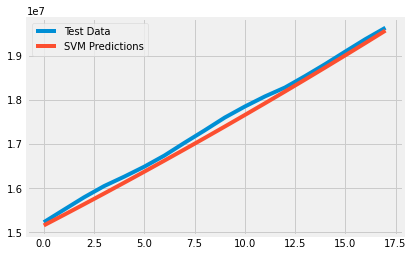

In [37]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [38]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [39]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 202185.23834680847
MSE: 49488146092.507744


In [40]:
print(linear_model.coef_)

[[ 1.62822507e+07 -8.93257106e+05  1.76839022e+04 -1.56350427e+02
   6.65074201e-01 -1.05880316e-03]]


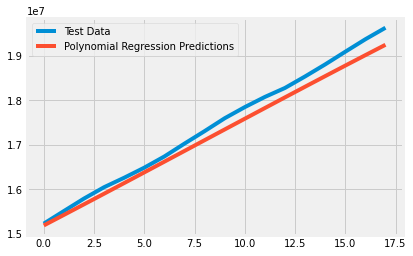

In [41]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [42]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    1.4s finished


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [43]:
bayesian_search.best_params_

{'tol': 0.01,
 'normalize': True,
 'lambda_2': 1e-07,
 'lambda_1': 0.0001,
 'alpha_2': 1e-05,
 'alpha_1': 0.001}

In [44]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 199409.1187073424
MSE: 43054873808.56151


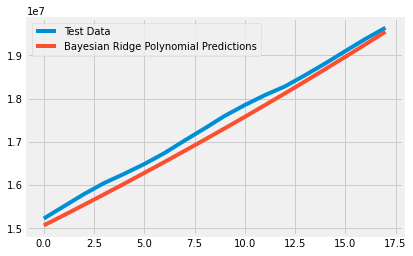

In [45]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions'])

#  Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate (CFR), and recovery rate
 <a id='world_wide_graphs'></a>

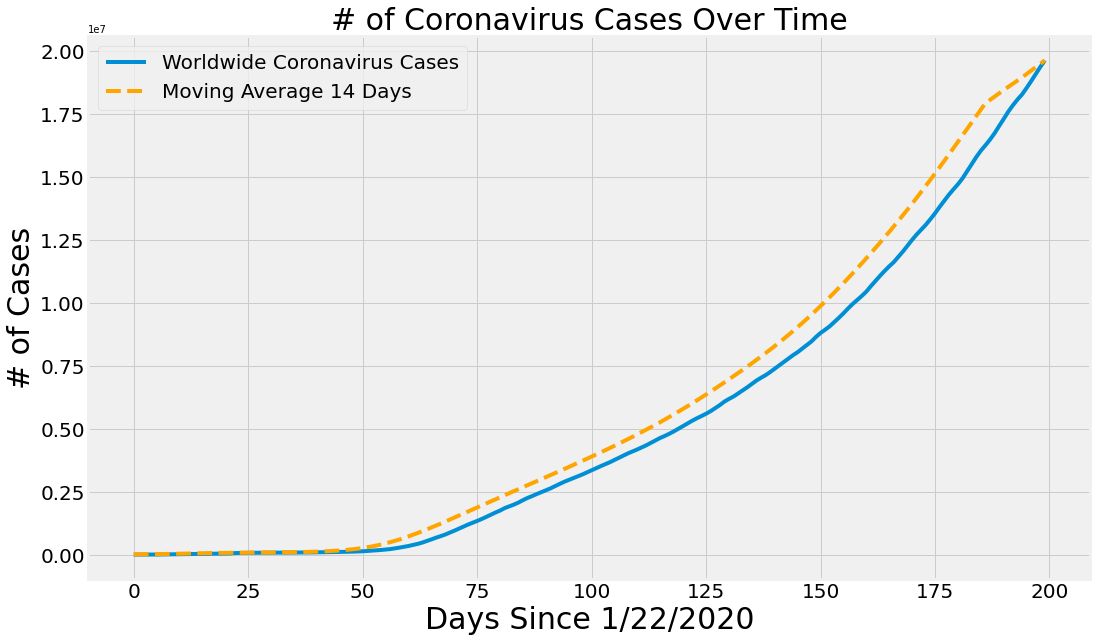

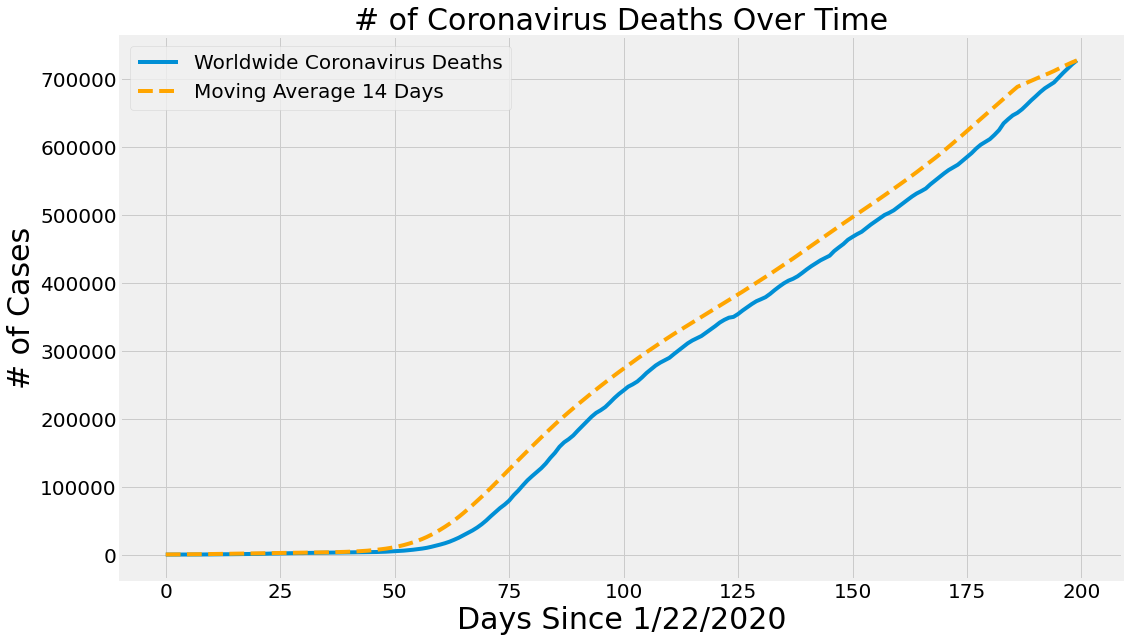

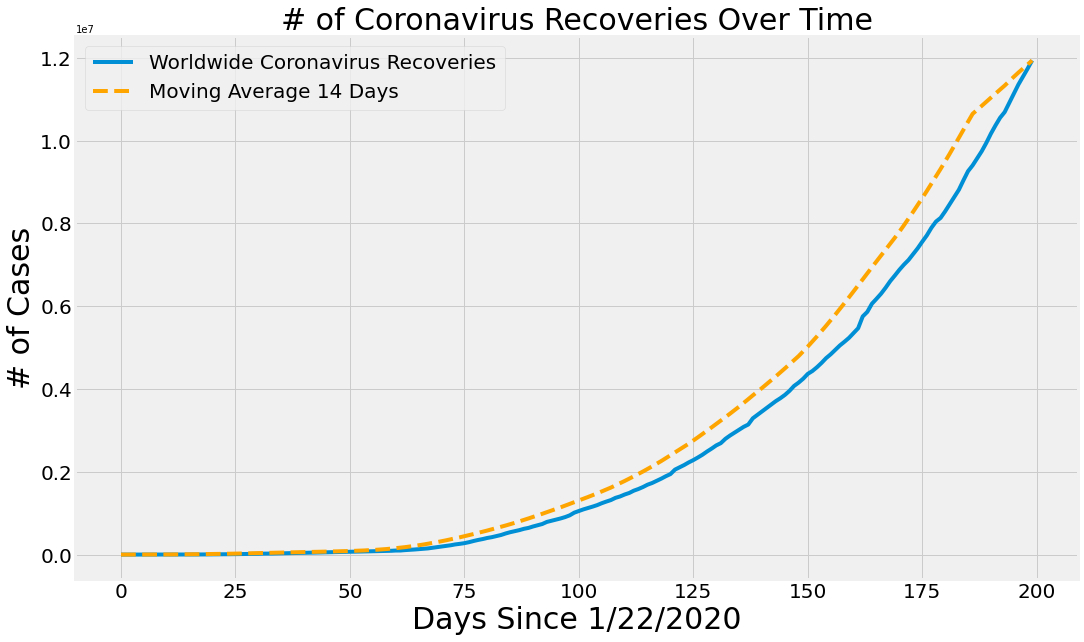

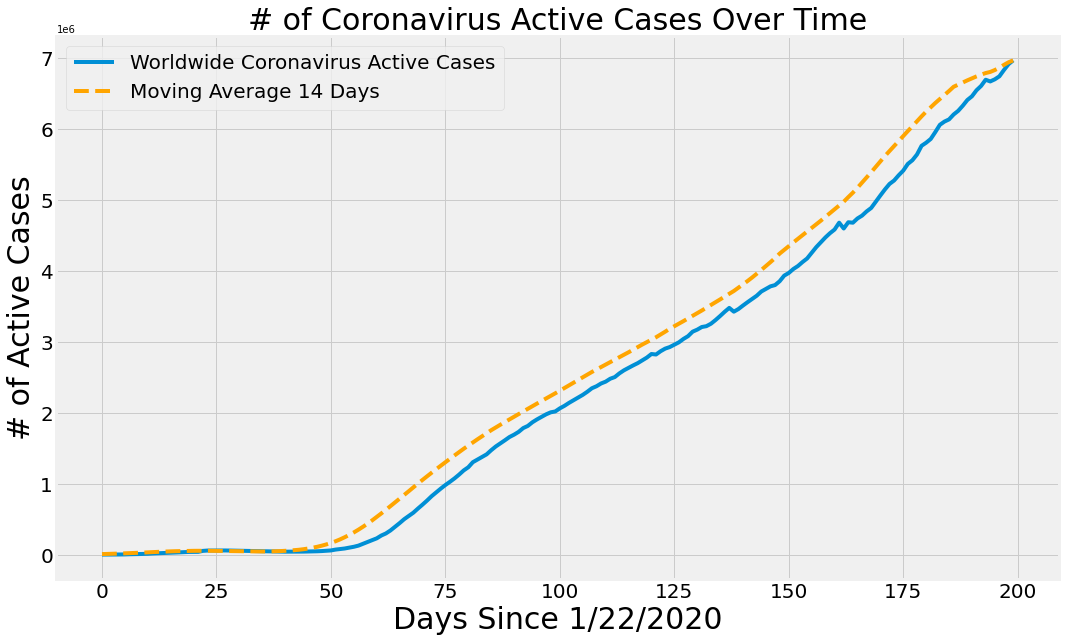

In [46]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average 14 Days'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average 14 Days'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_recovered)
plt.plot(adjusted_dates, world_recovery_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Recoveries', 'Moving Average 14 Days'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_active)
plt.plot(adjusted_dates, world_active_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Active Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Active Cases', size=30)
plt.legend(['Worldwide Coronavirus Active Cases', 'Moving Average 14 Days'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

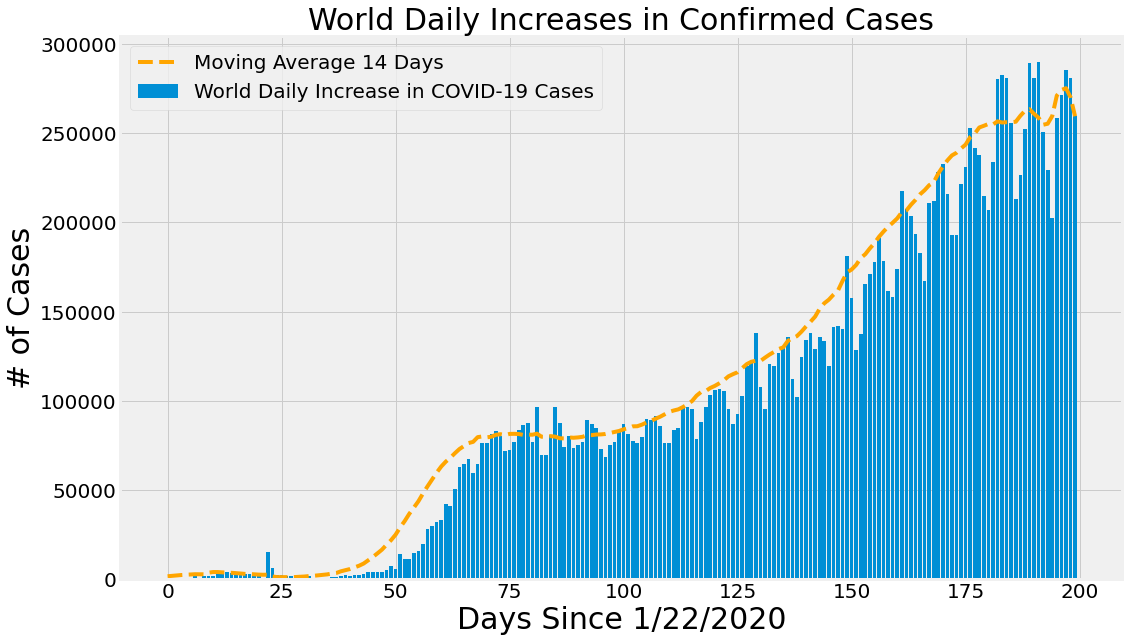

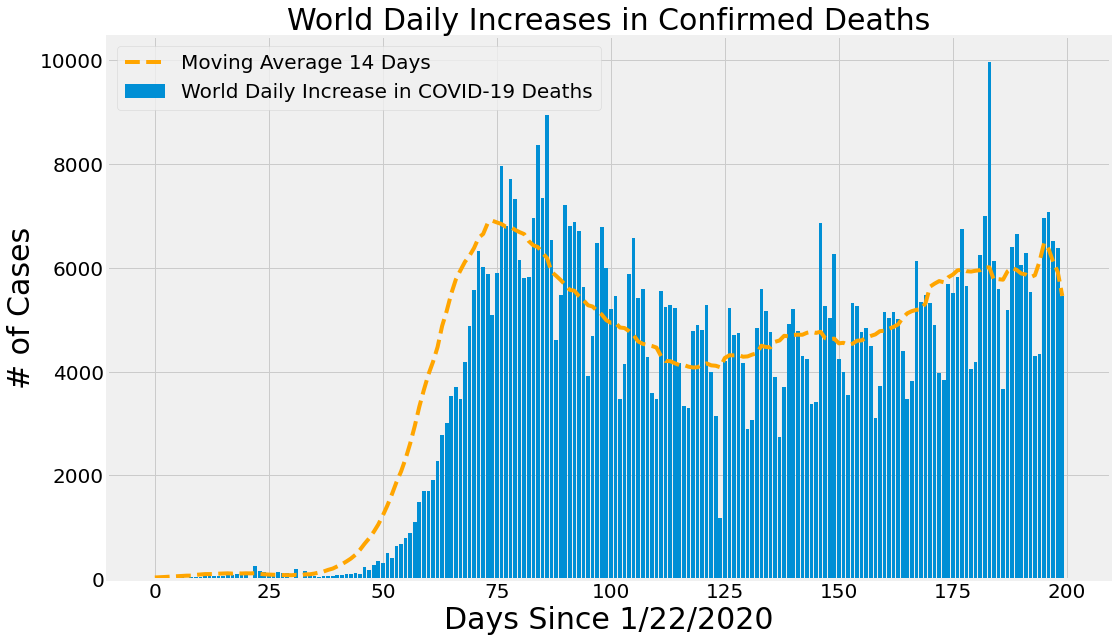

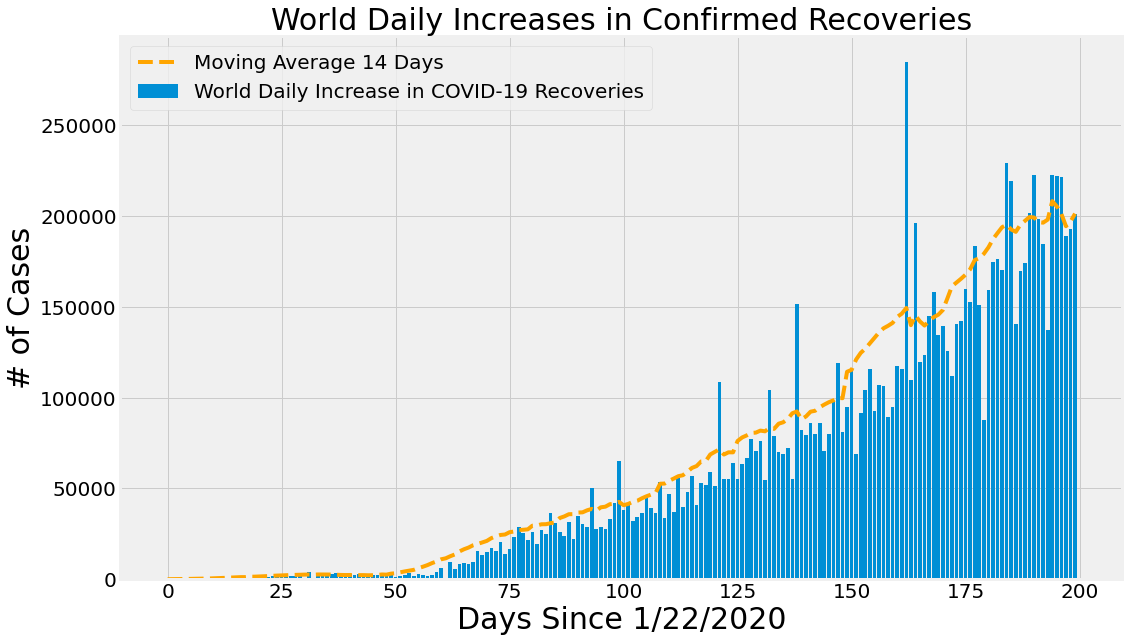

In [47]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average 14 Days', 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average 14 Days', 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_recovery)
plt.plot(adjusted_dates, world_daily_recovery_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average 14 Days', 'World Daily Increase in COVID-19 Recoveries'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

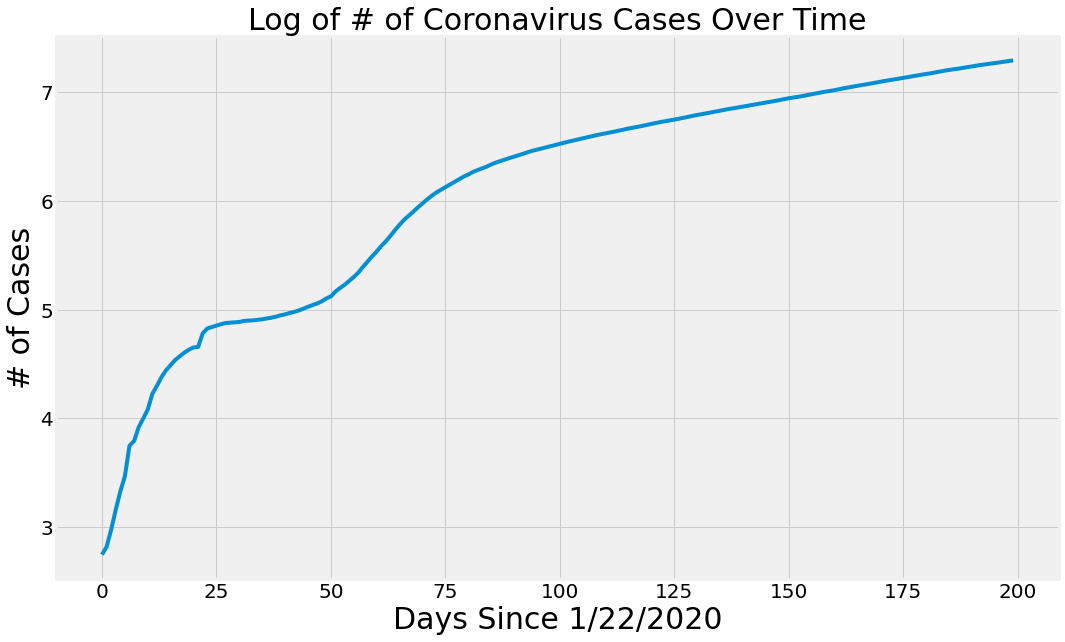

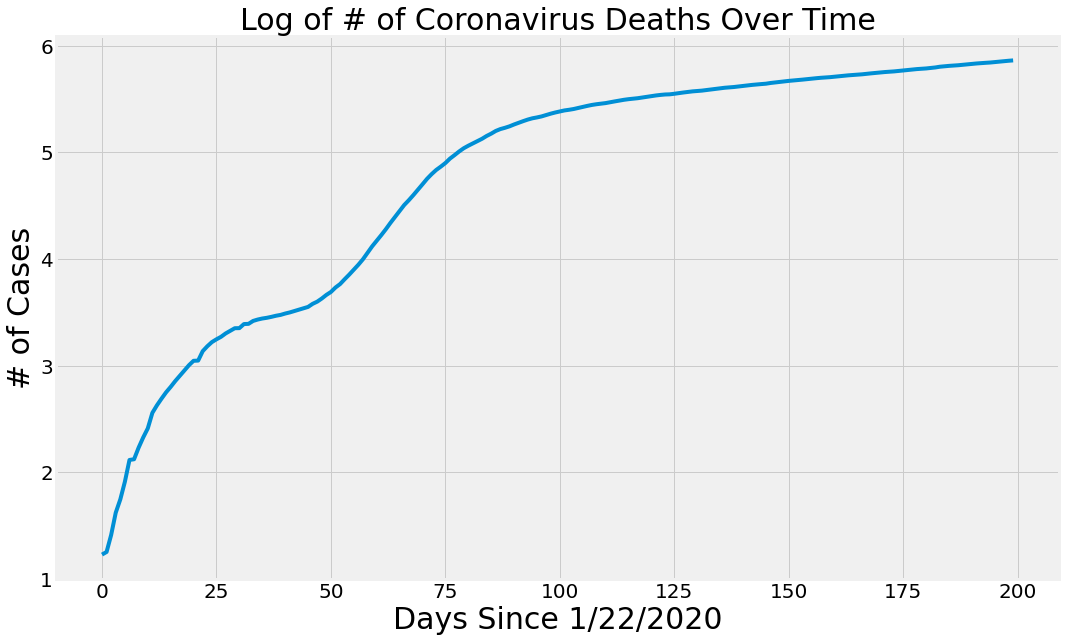

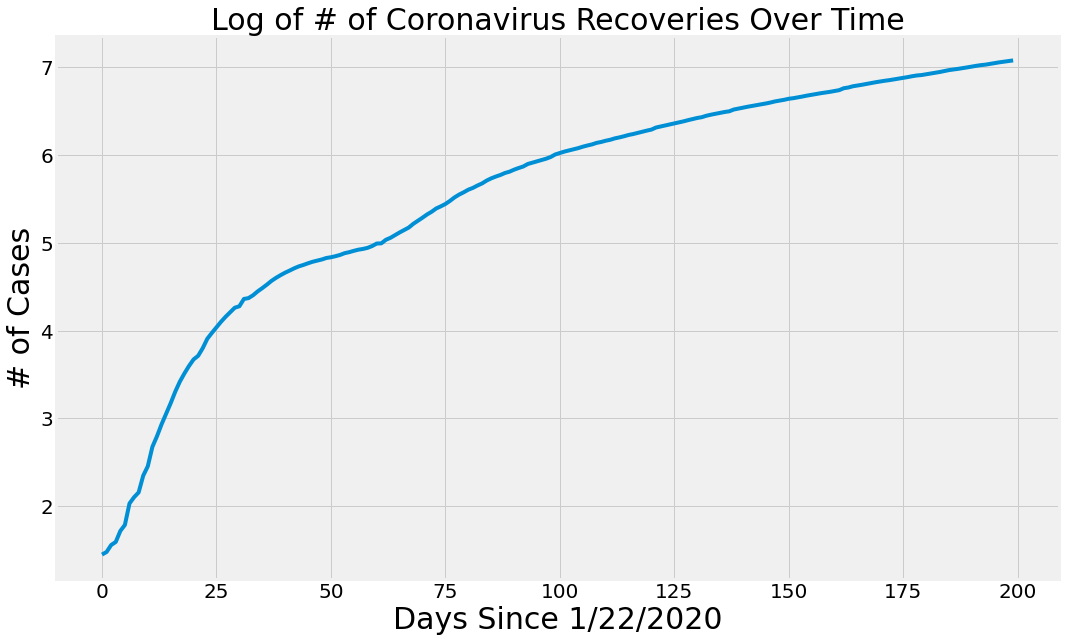

In [48]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_recovered))
plt.title('Log of # of Coronavirus Recoveries Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [49]:
def country_plot(x, y1, y2, y3, y4, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
    recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average 14 Days'], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average 14 Days', '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average 14 Days', '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y4)
    plt.plot(x, recovery_increase_avg, color='red', linestyle='dashed')
    plt.legend([ 'Moving Average 14 Days', '{} Daily Increase in Confirmed Recoveries'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Recoveries'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Country Specific Graphs
<a id='country_graphs'></a>

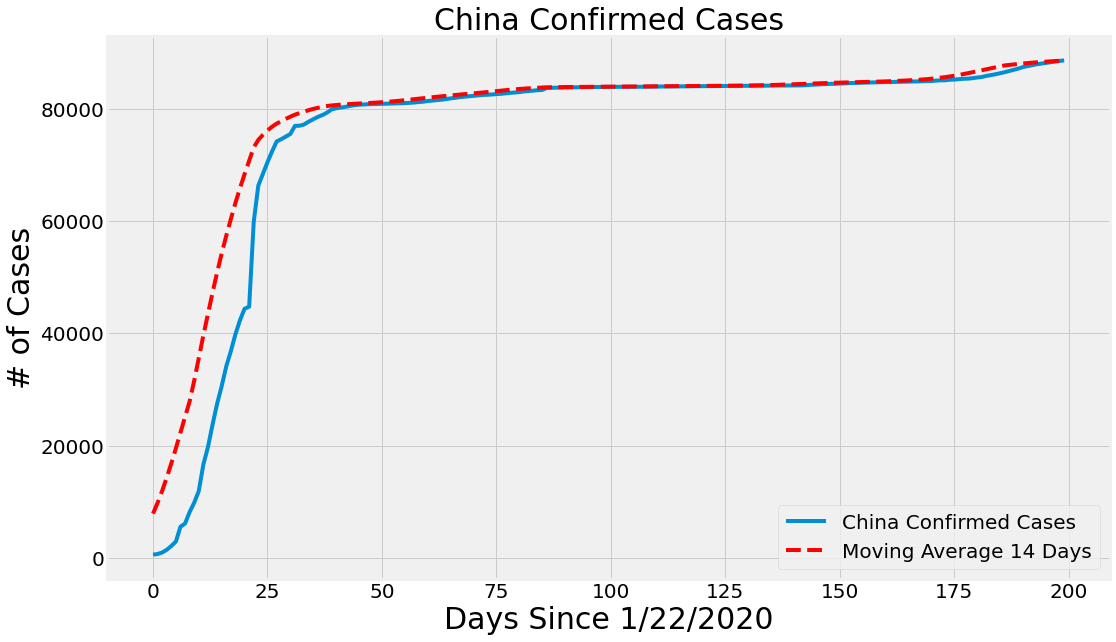

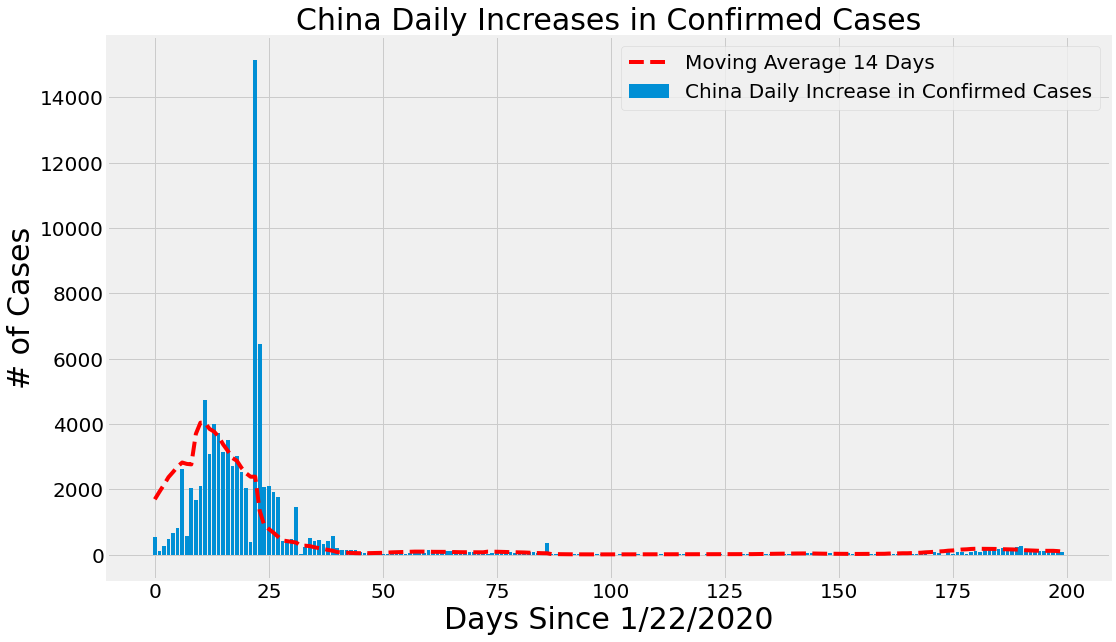

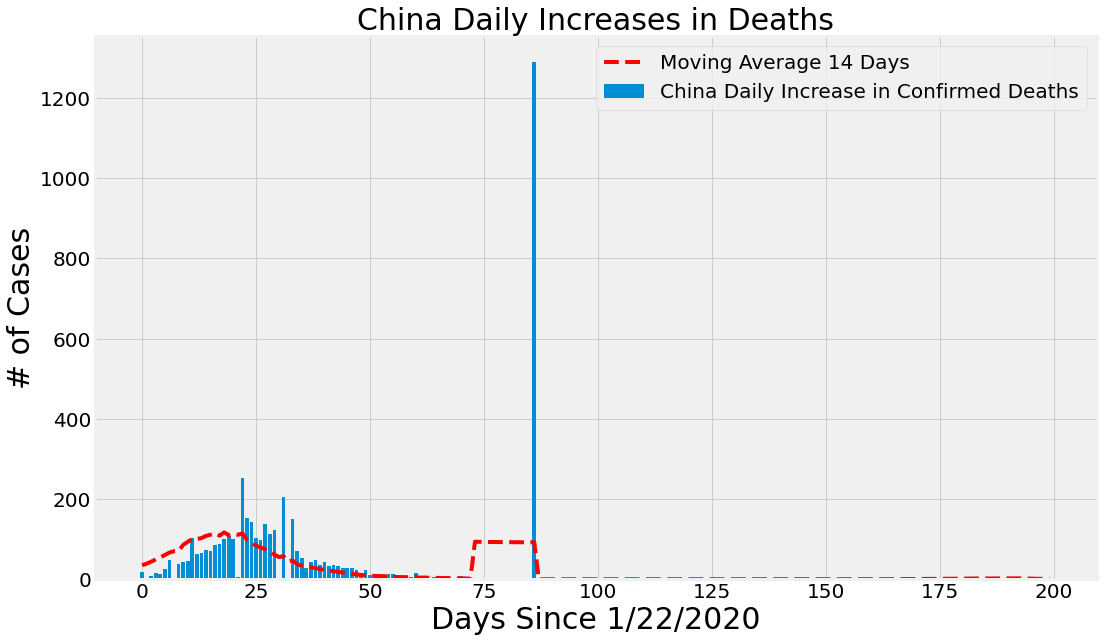

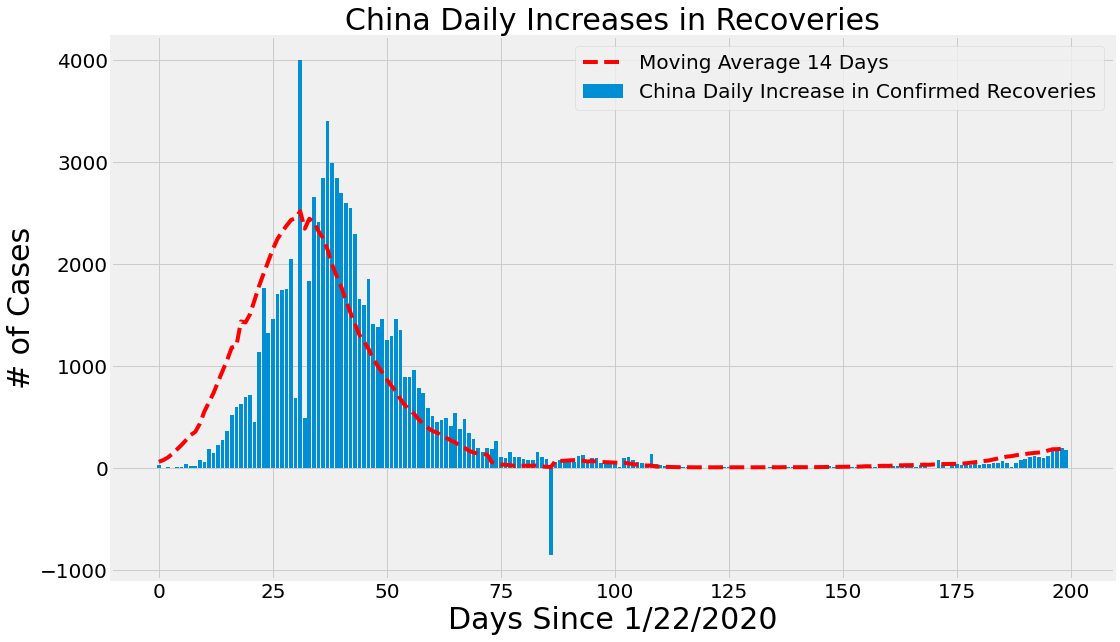

In [50]:
country_plot(adjusted_dates, china_cases, china_daily_increase, china_daily_death, china_daily_recovery, 'China')

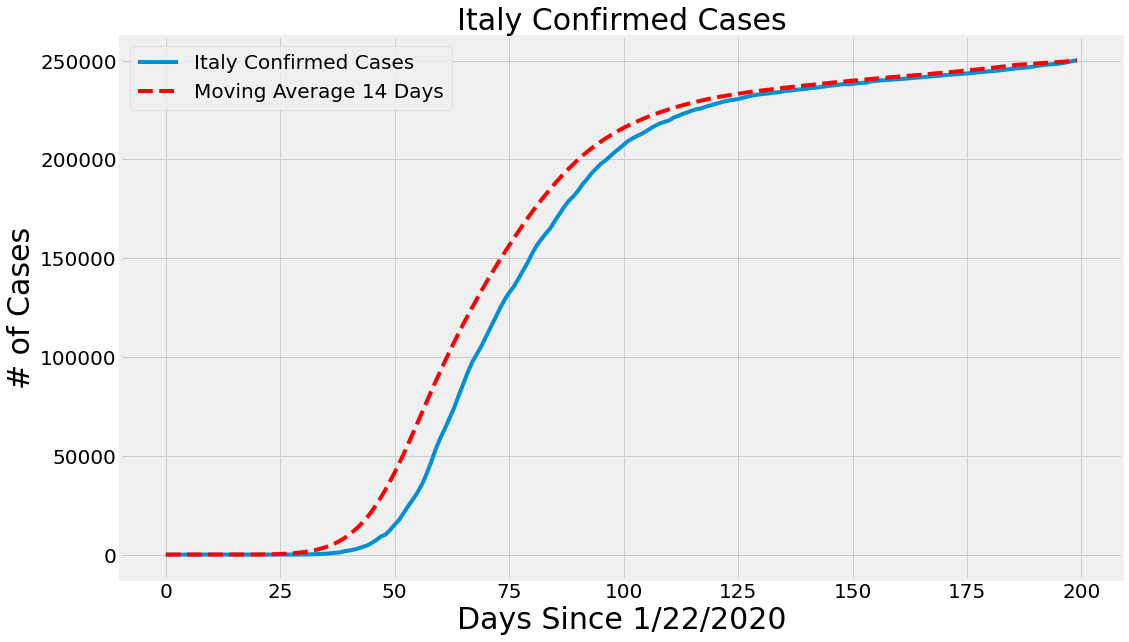

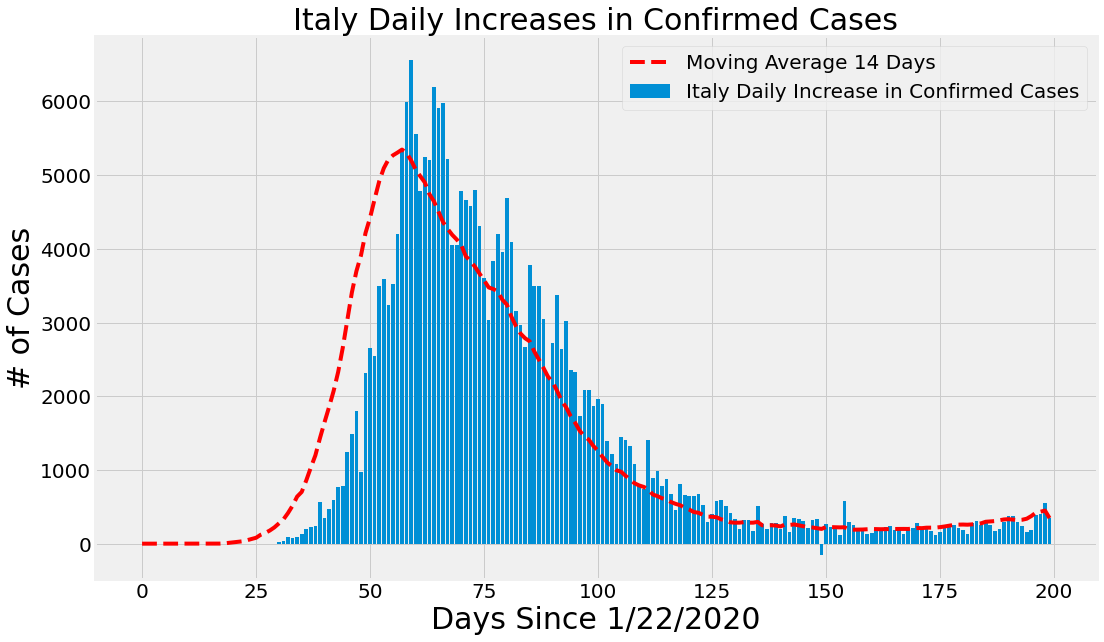

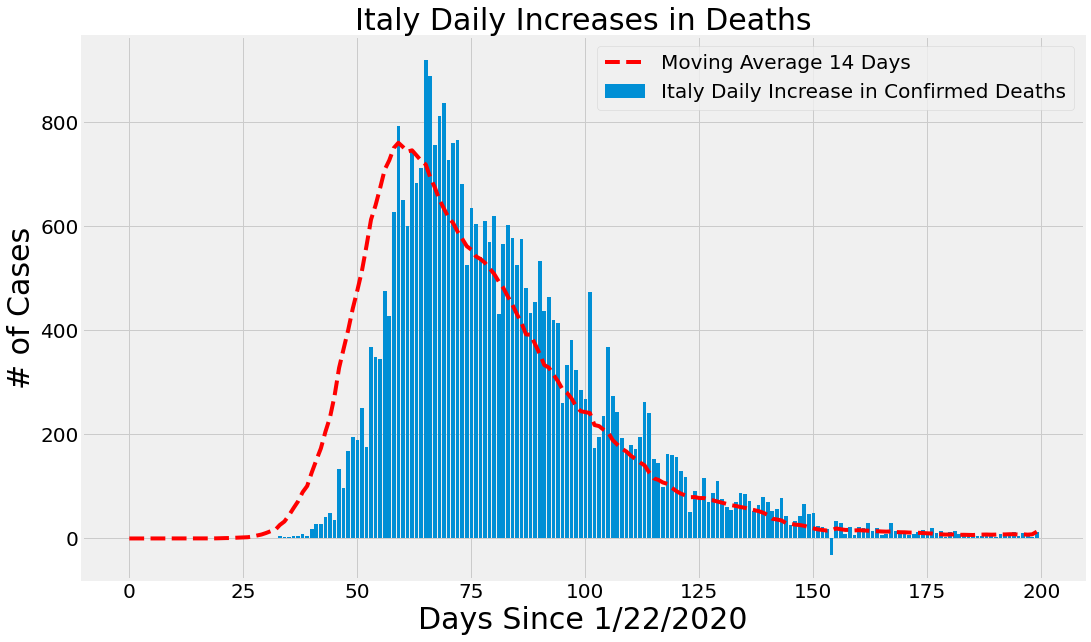

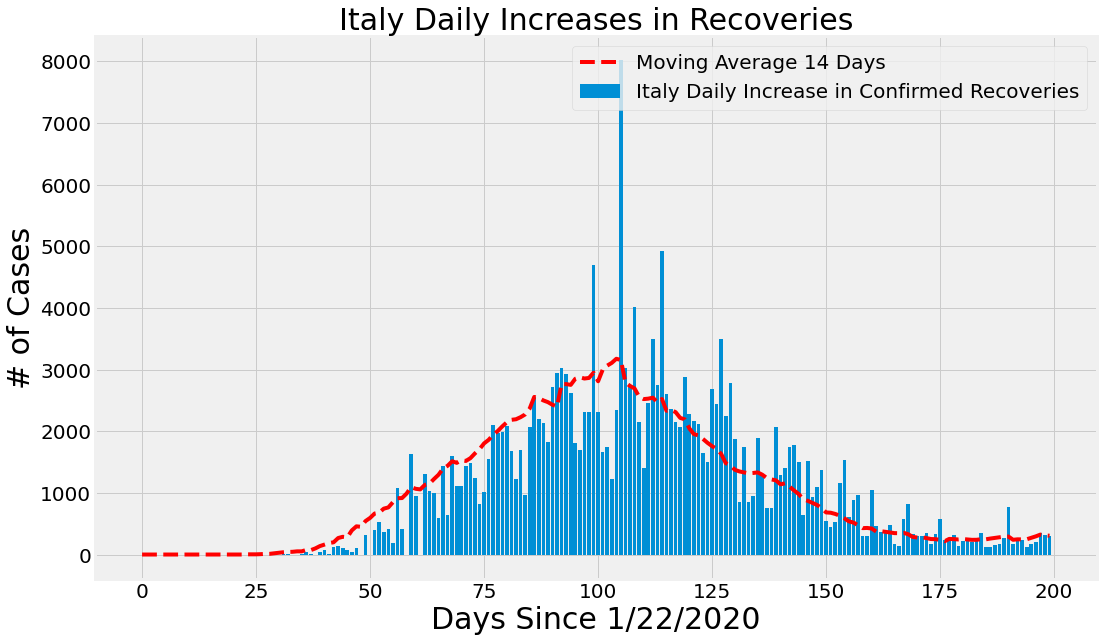

In [51]:
country_plot(adjusted_dates, italy_cases, italy_daily_increase, italy_daily_death, italy_daily_recovery, 'Italy')

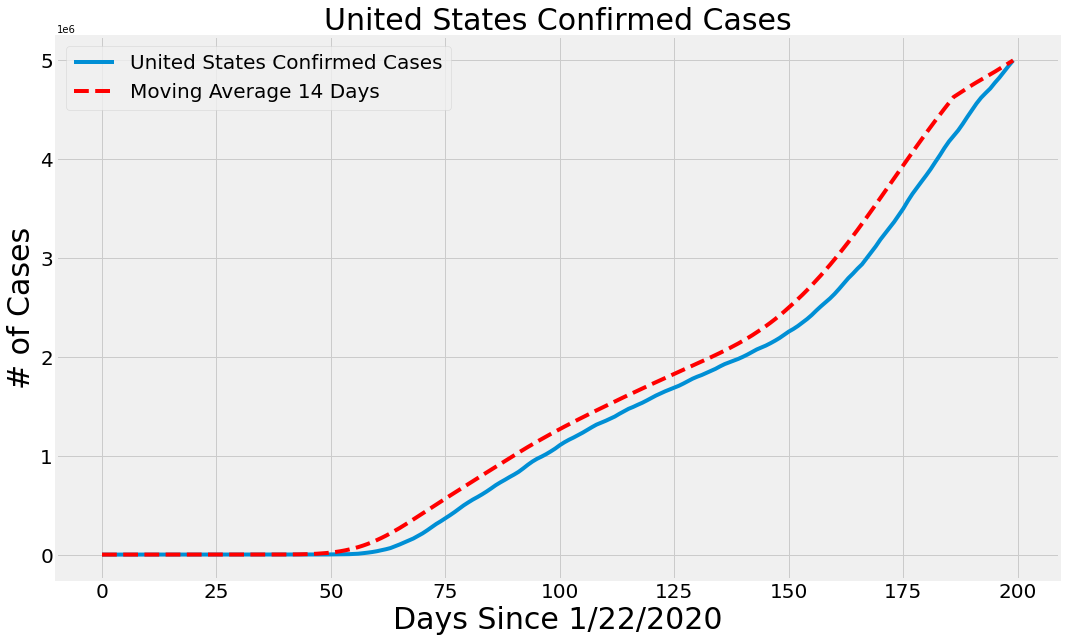

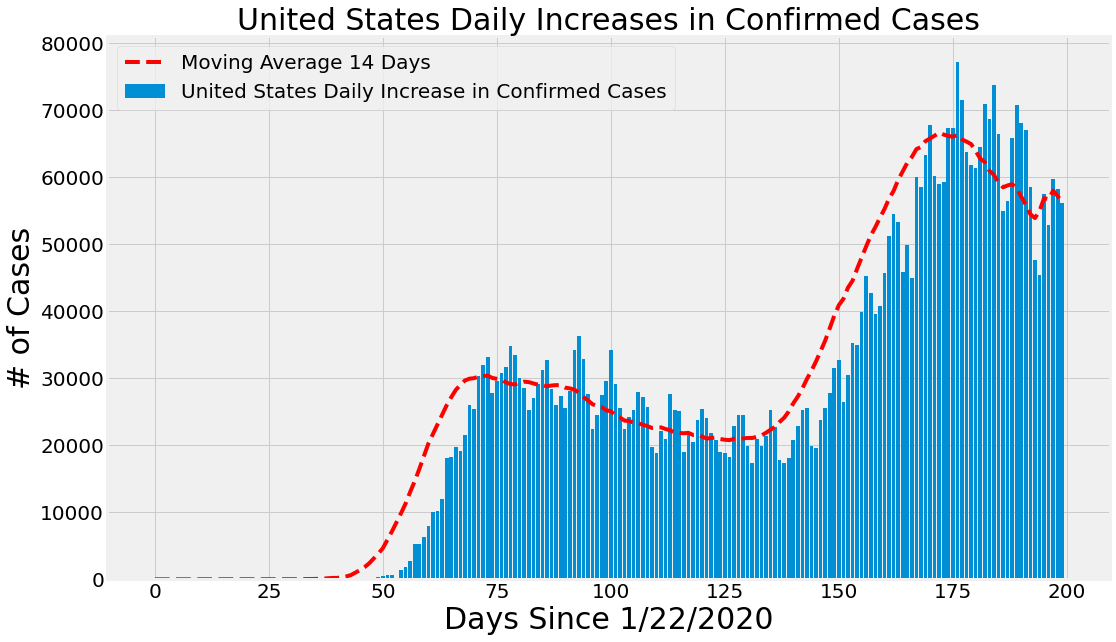

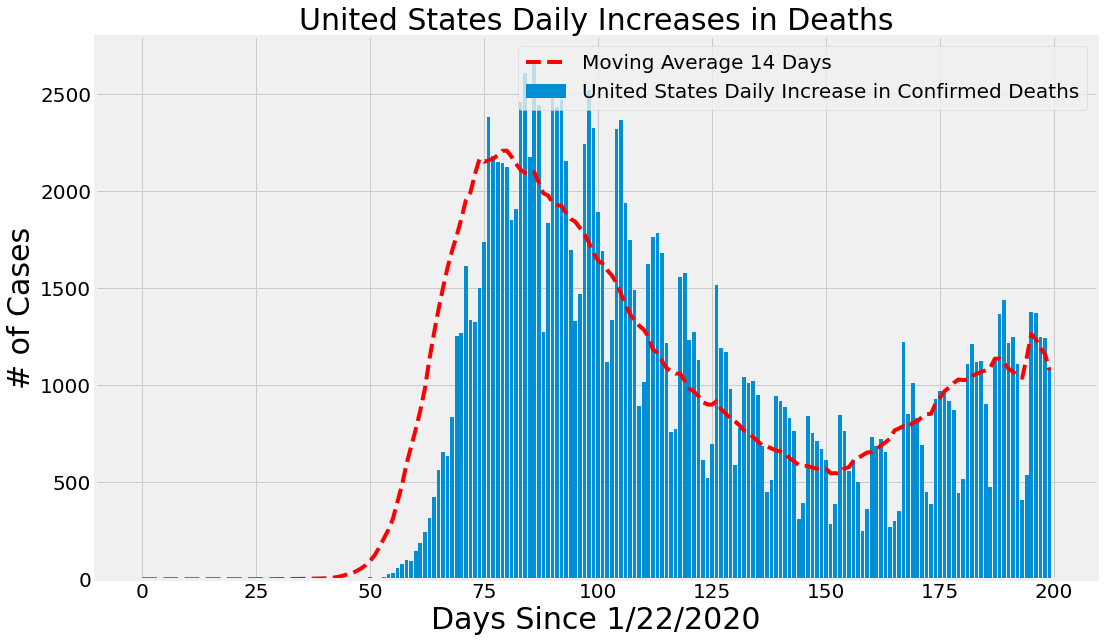

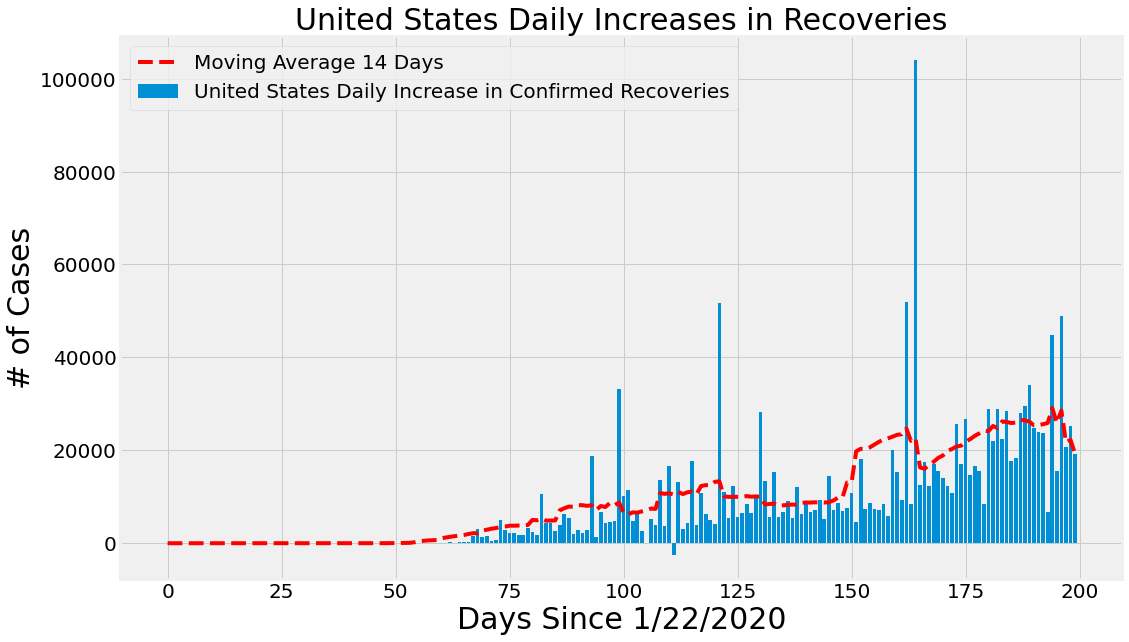

In [52]:
country_plot(adjusted_dates, us_cases, us_daily_increase, us_daily_death, us_daily_recovery, 'United States')

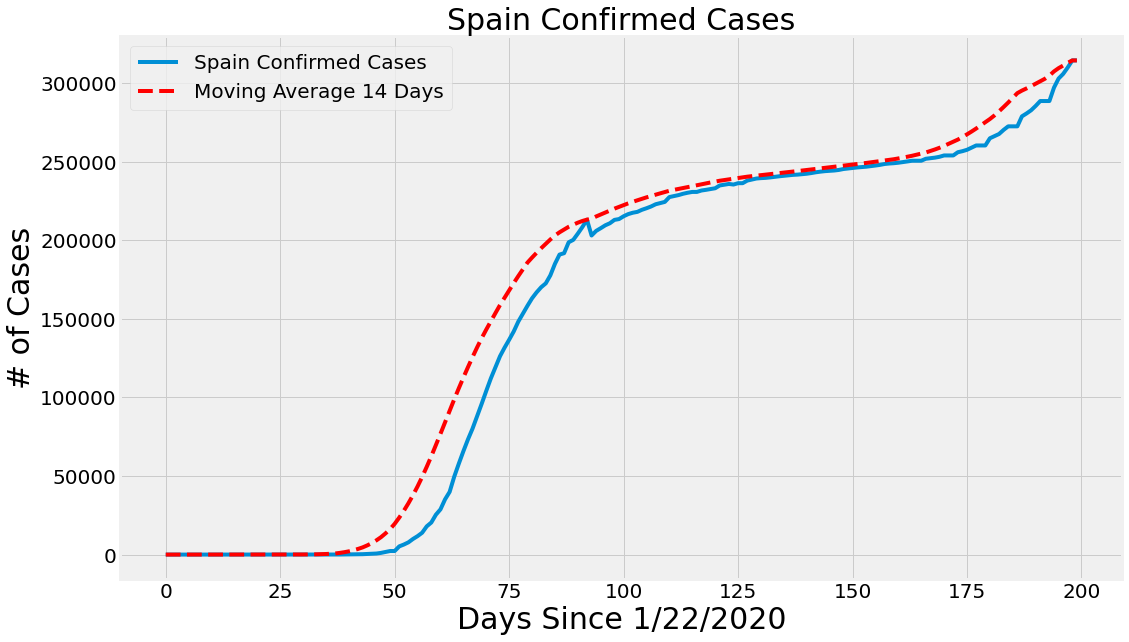

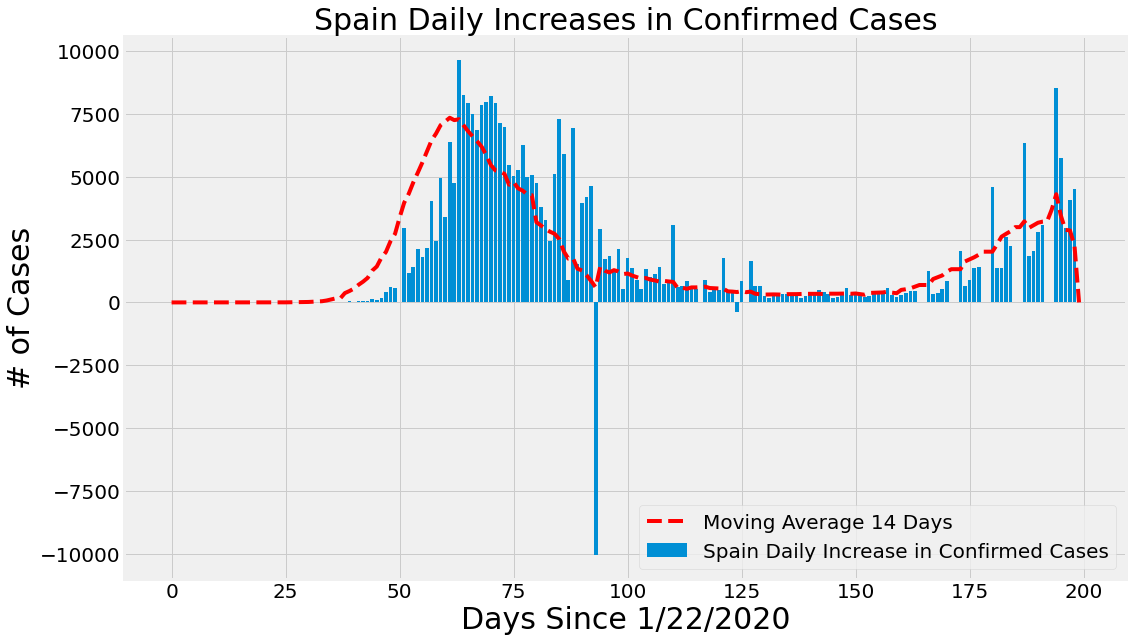

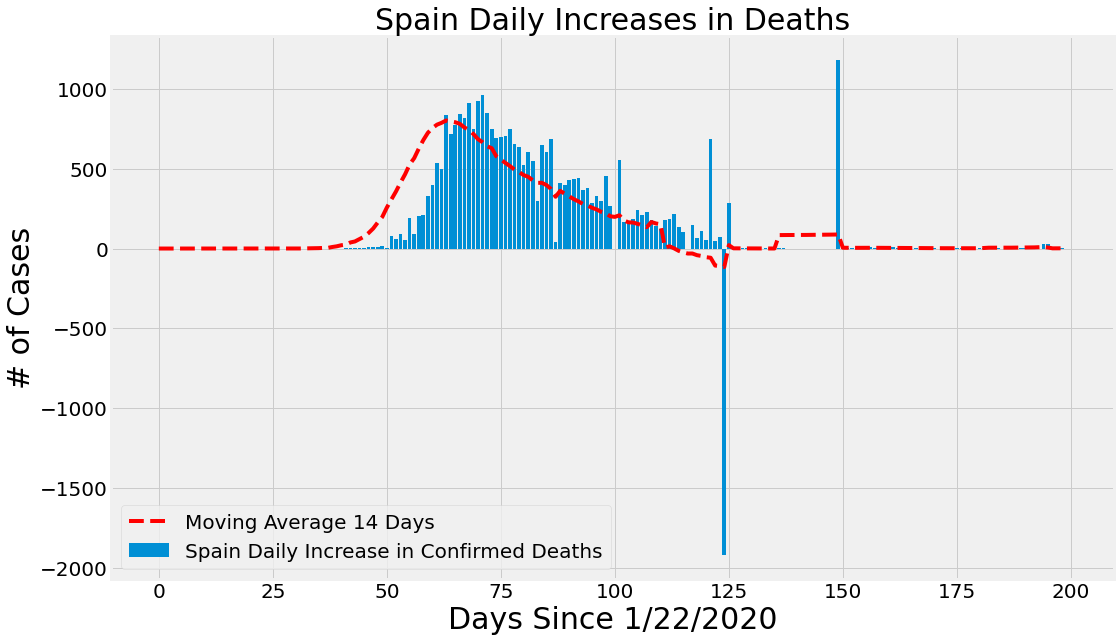

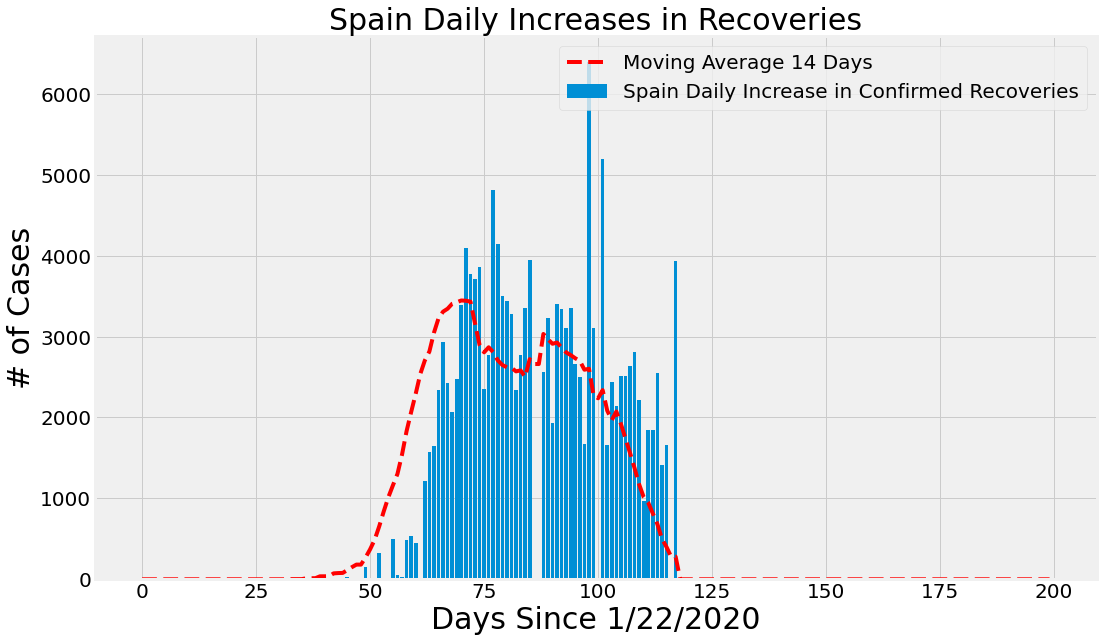

In [53]:
country_plot(adjusted_dates, spain_cases, spain_daily_increase, spain_daily_death, spain_daily_recovery, 'Spain')

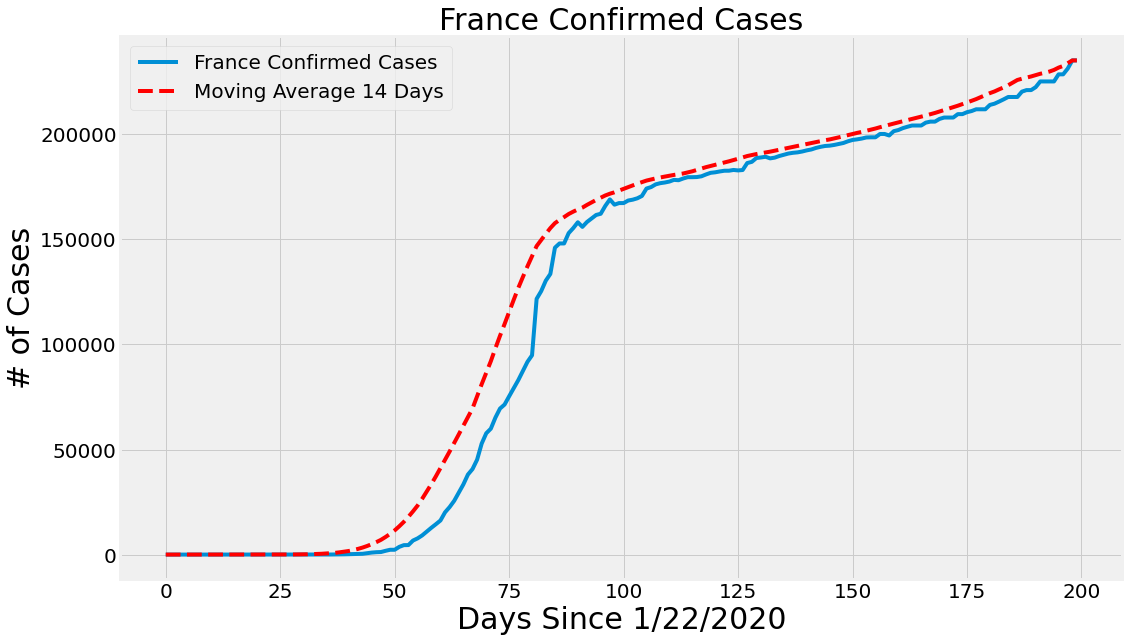

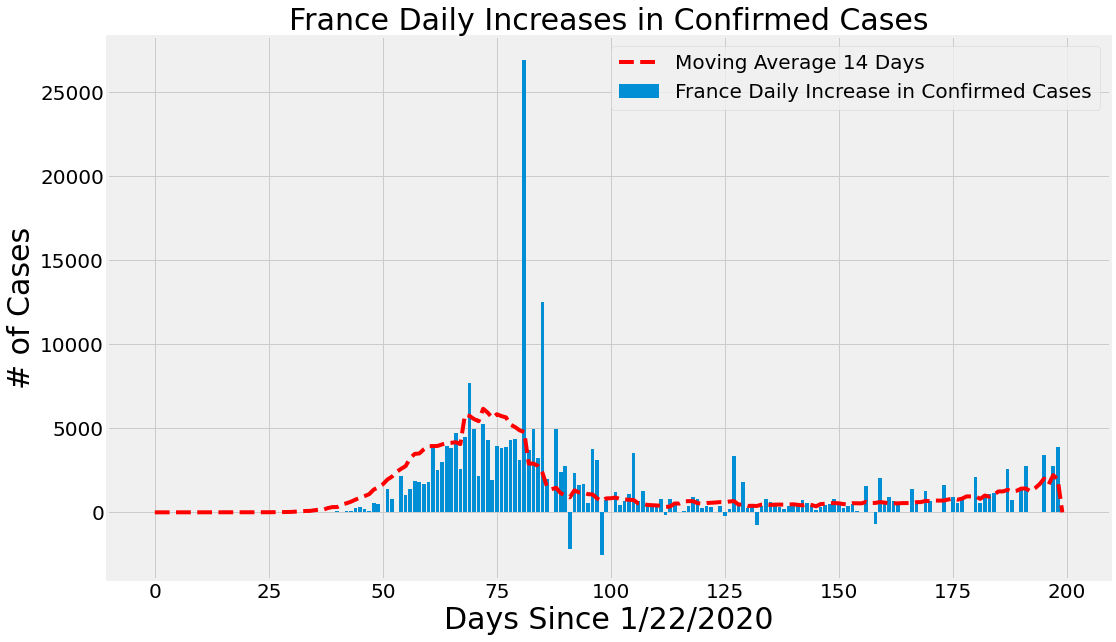

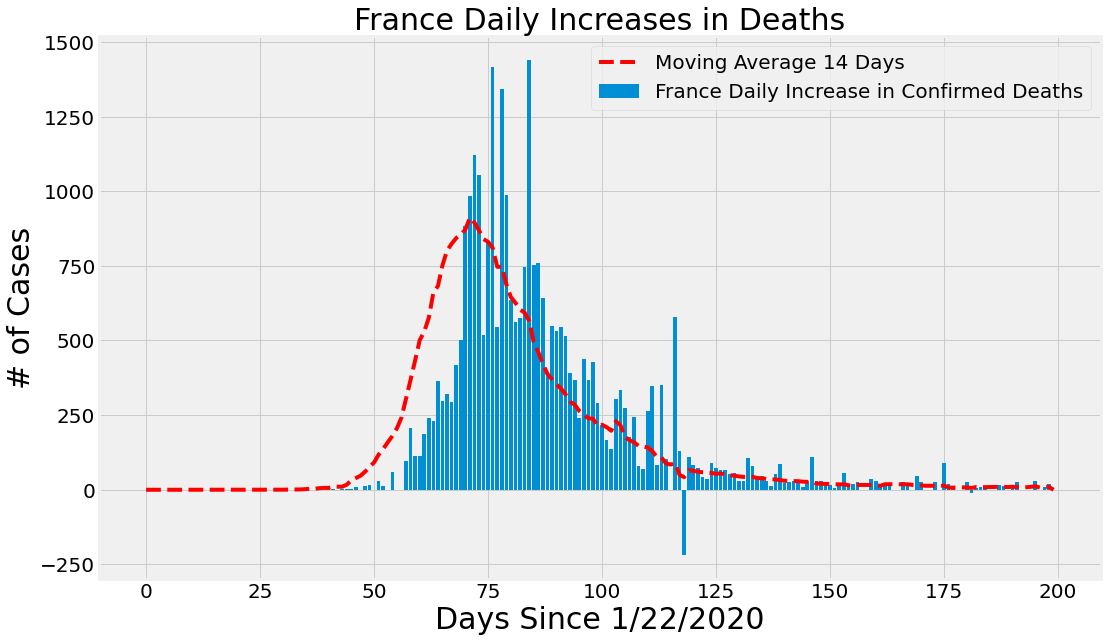

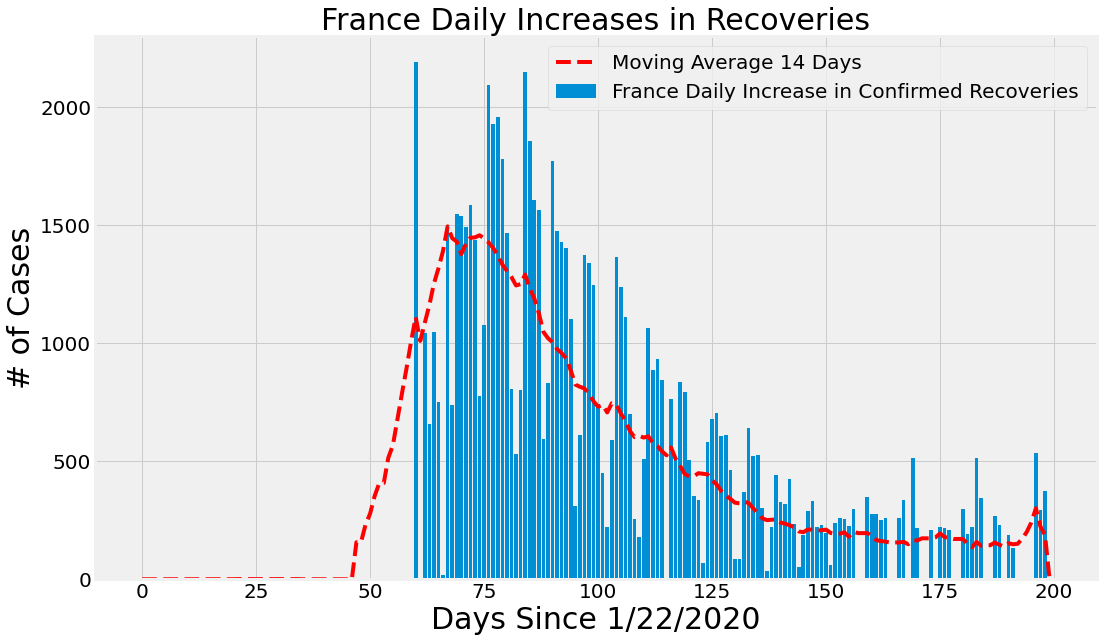

In [54]:
country_plot(adjusted_dates, france_cases, france_daily_increase, france_daily_death, france_daily_recovery, 'France')

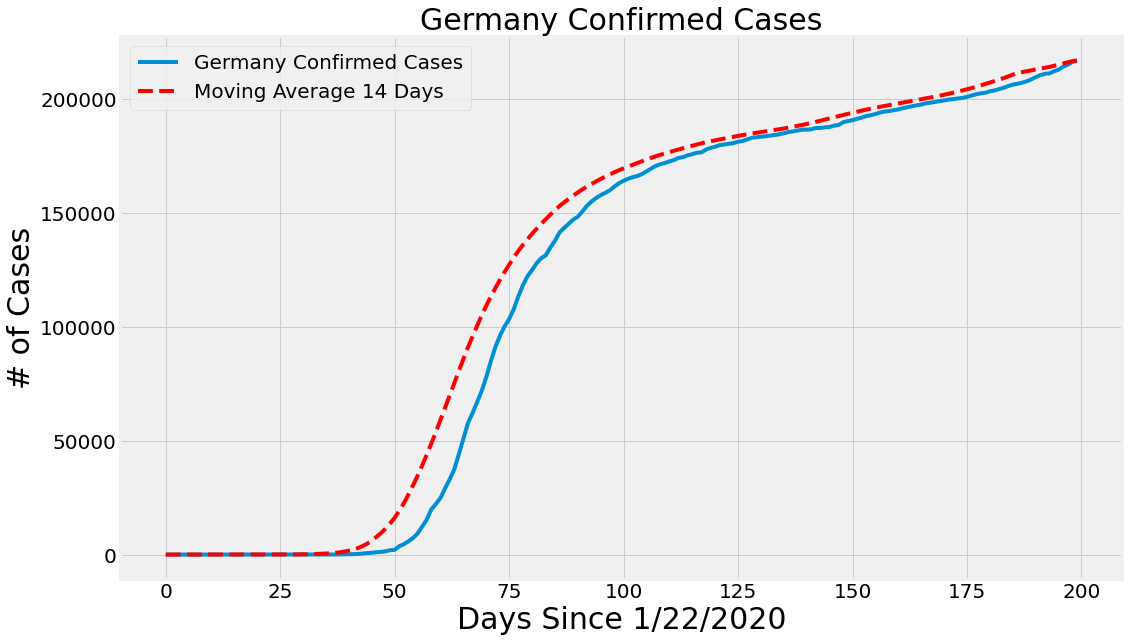

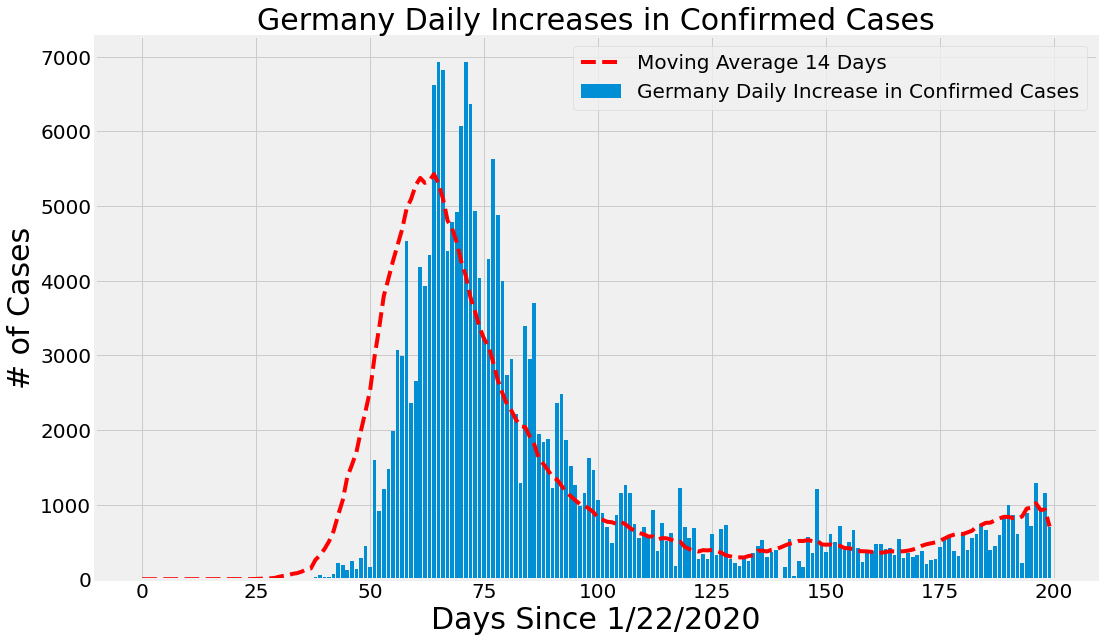

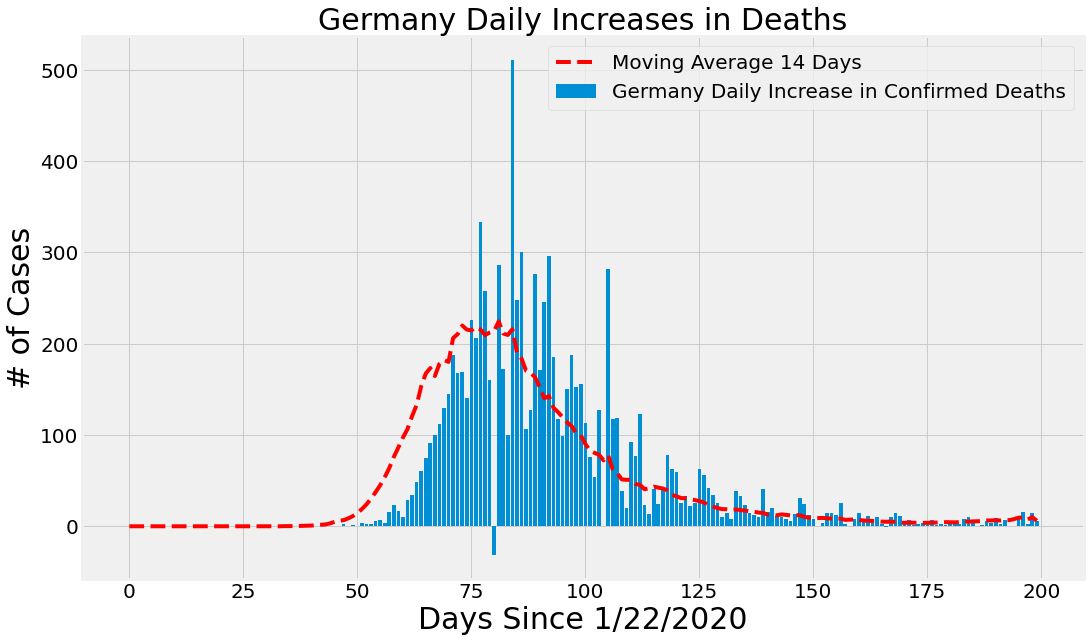

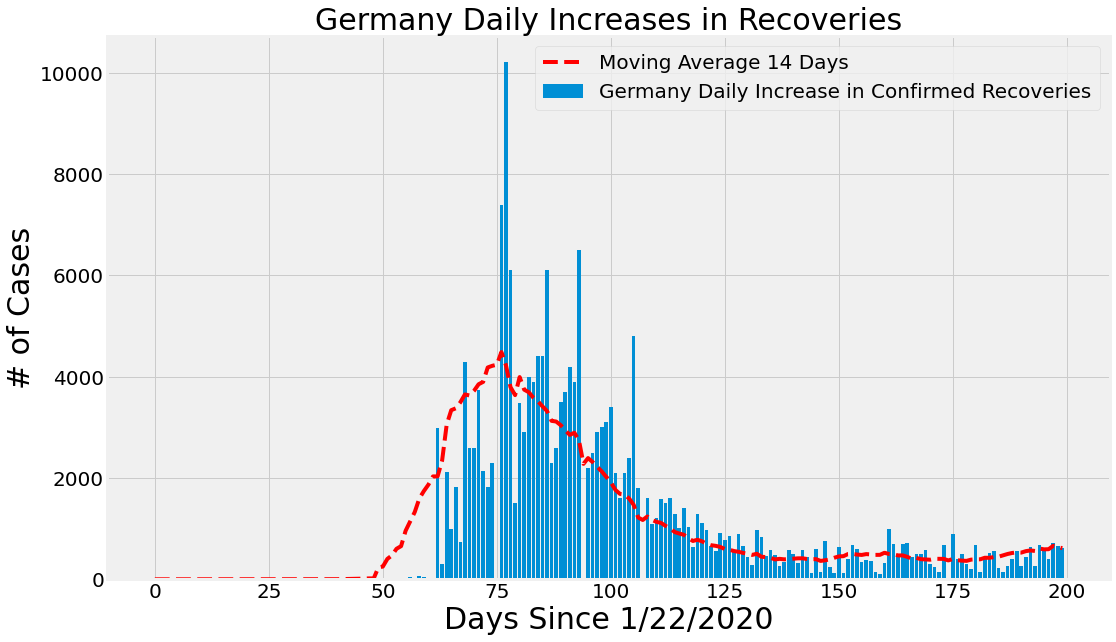

In [55]:
country_plot(adjusted_dates, germany_cases, germany_daily_increase, germany_daily_death, germany_daily_recovery, 'Germany')

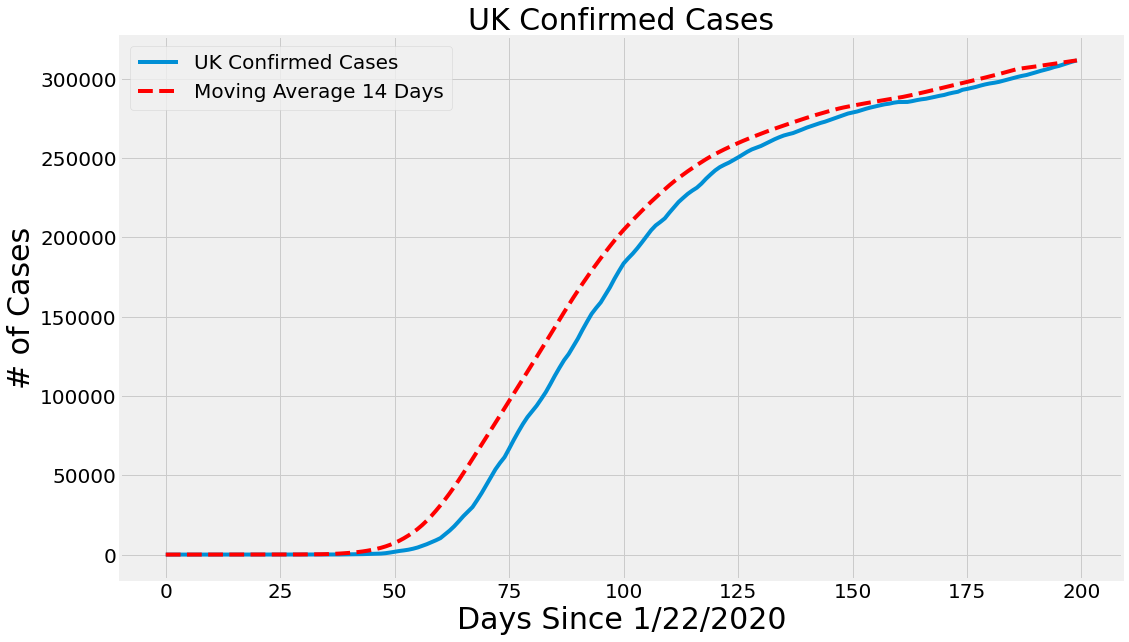

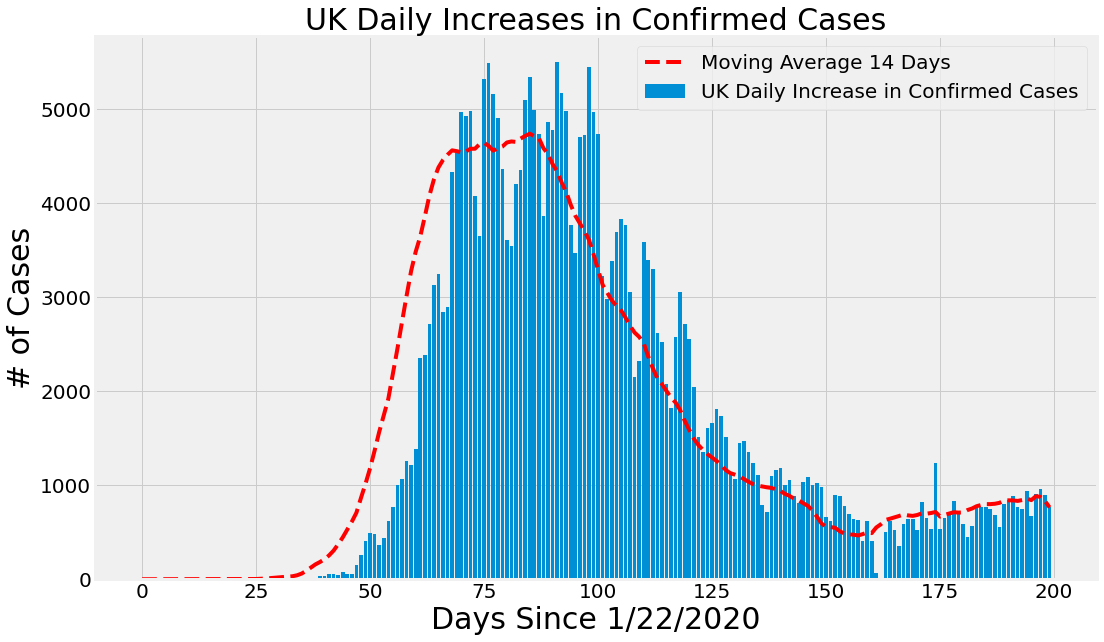

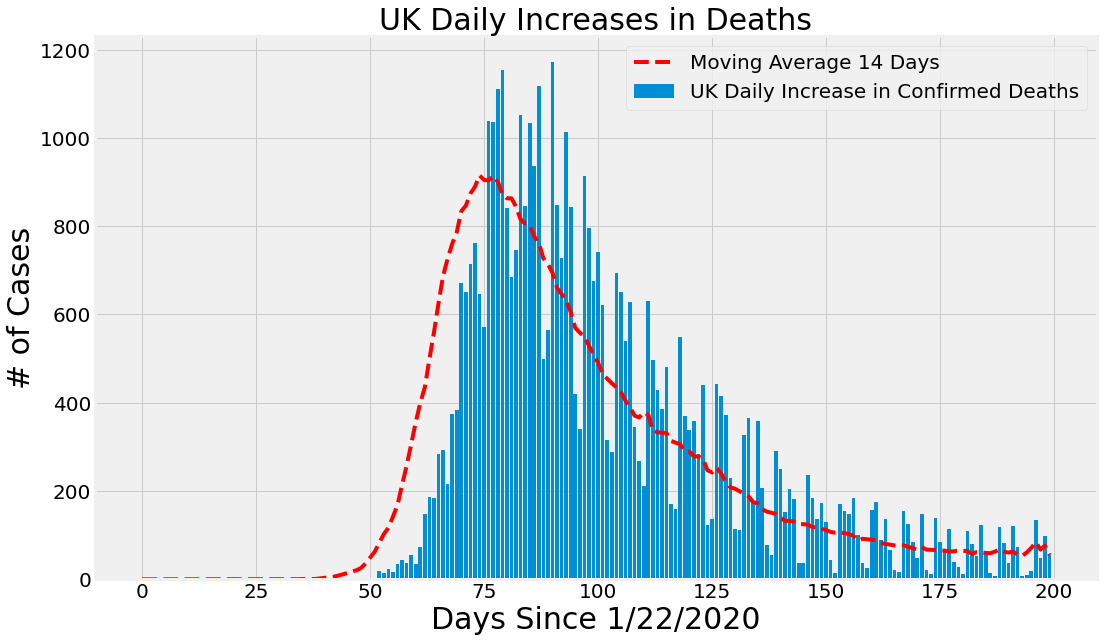

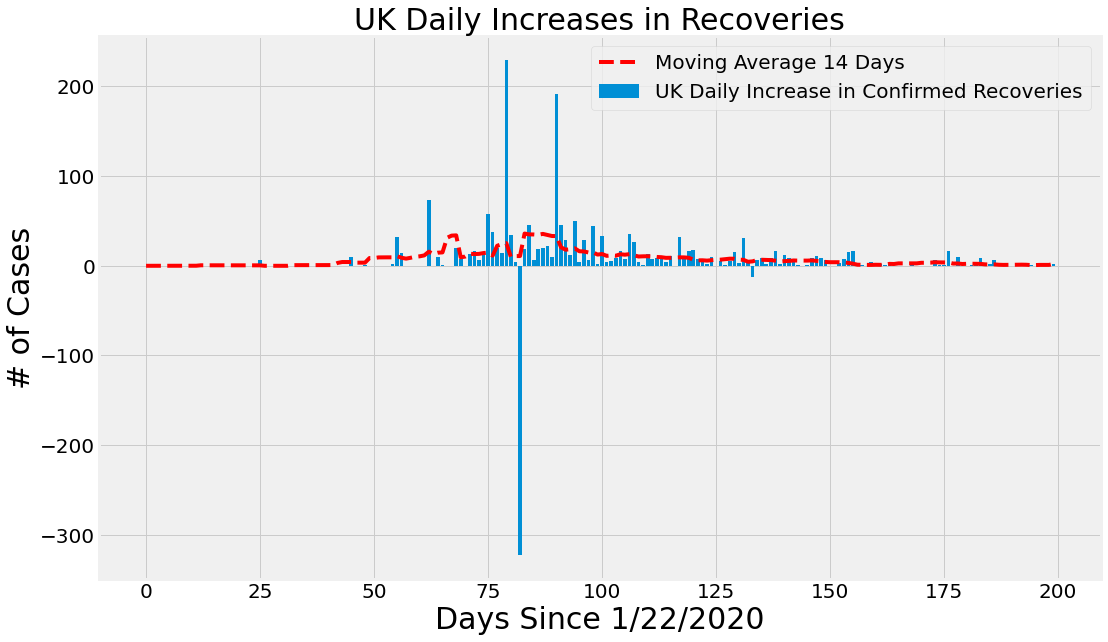

In [56]:
country_plot(adjusted_dates, uk_cases, uk_daily_increase, uk_daily_death, uk_daily_recovery, 'UK')

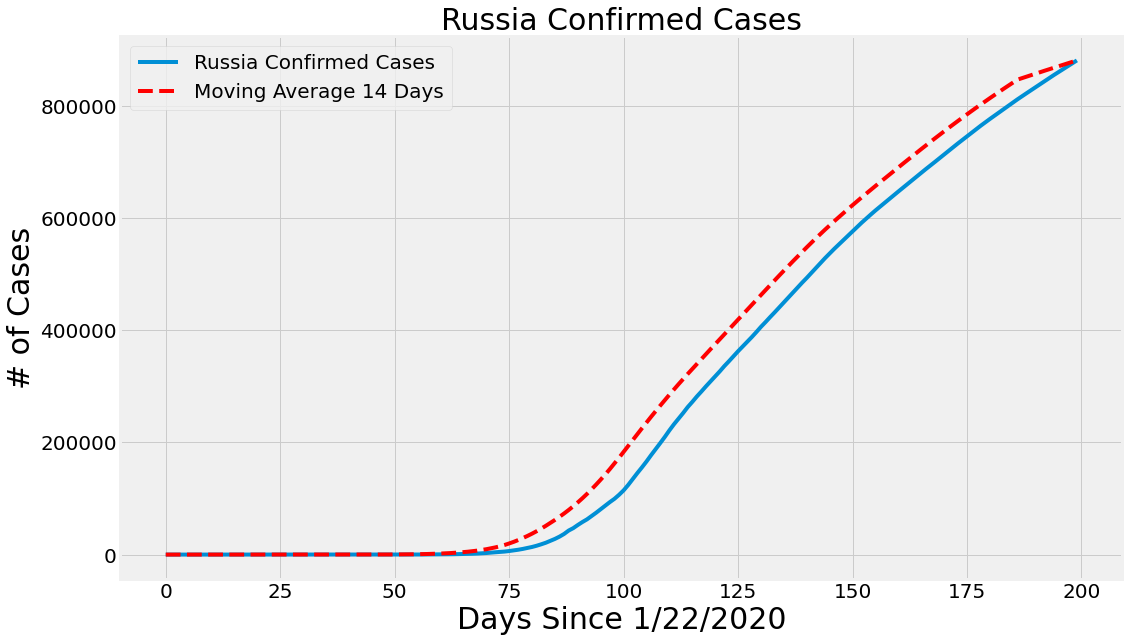

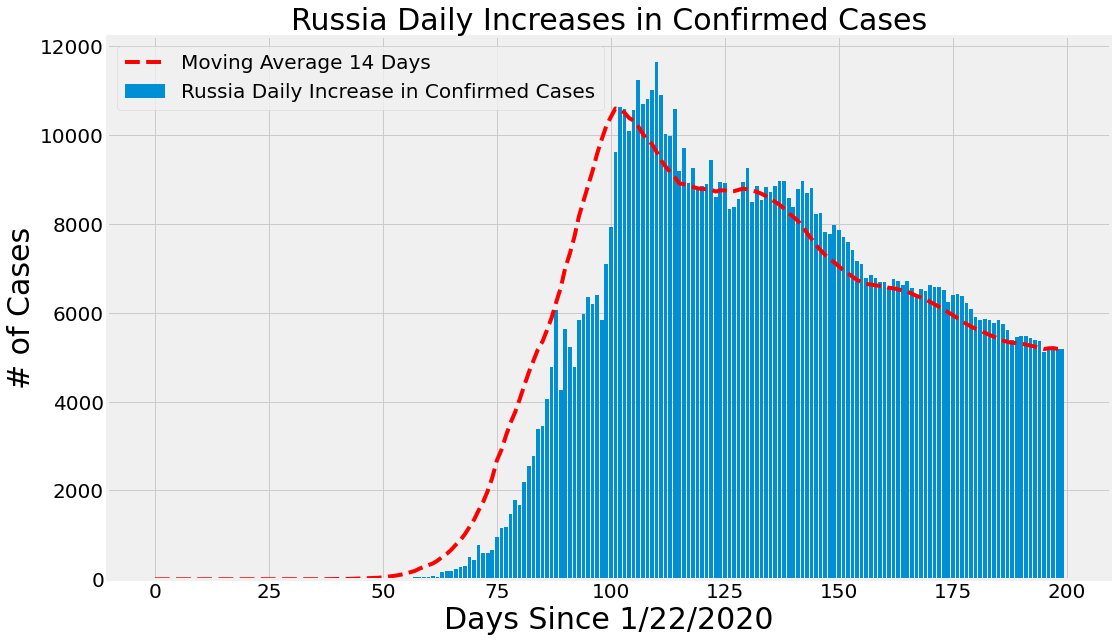

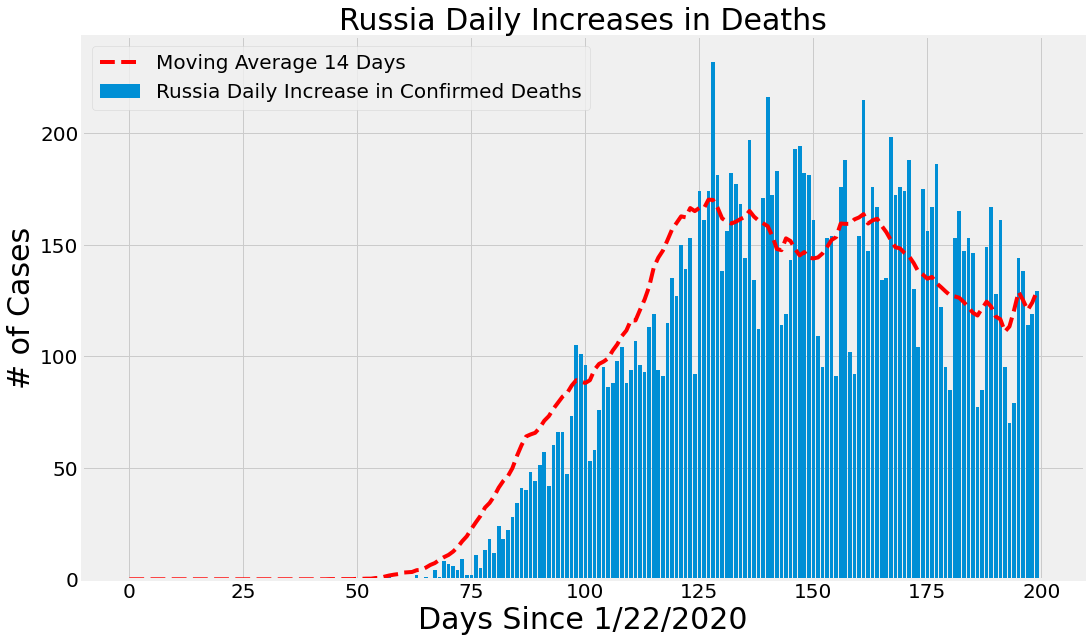

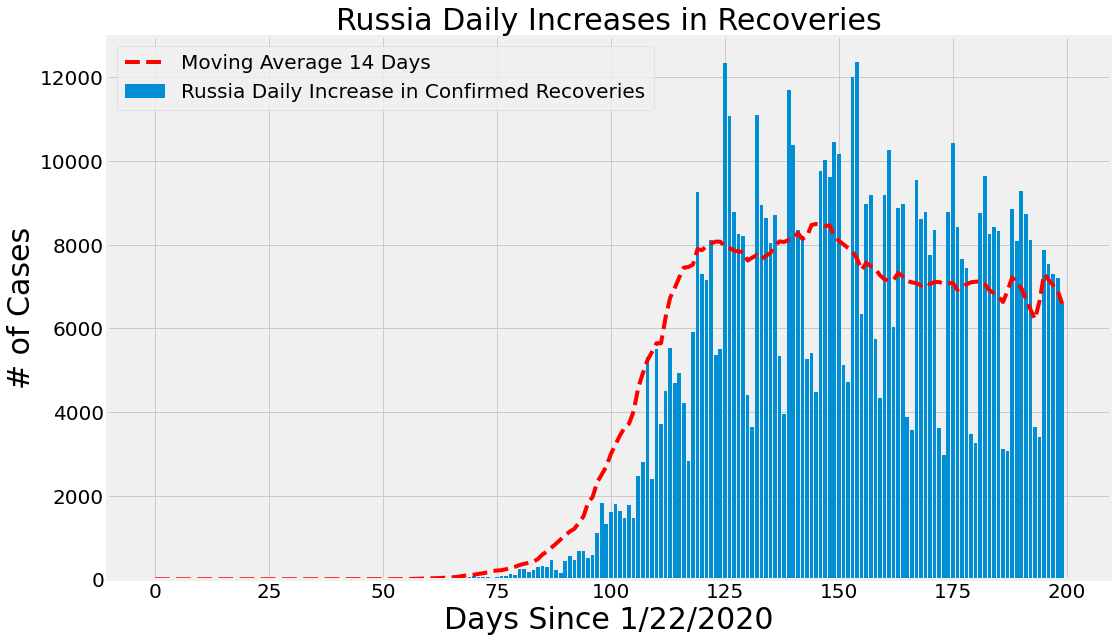

In [57]:
country_plot(adjusted_dates, russia_cases, russia_daily_increase, russia_daily_death, russia_daily_recovery, 'Russia')

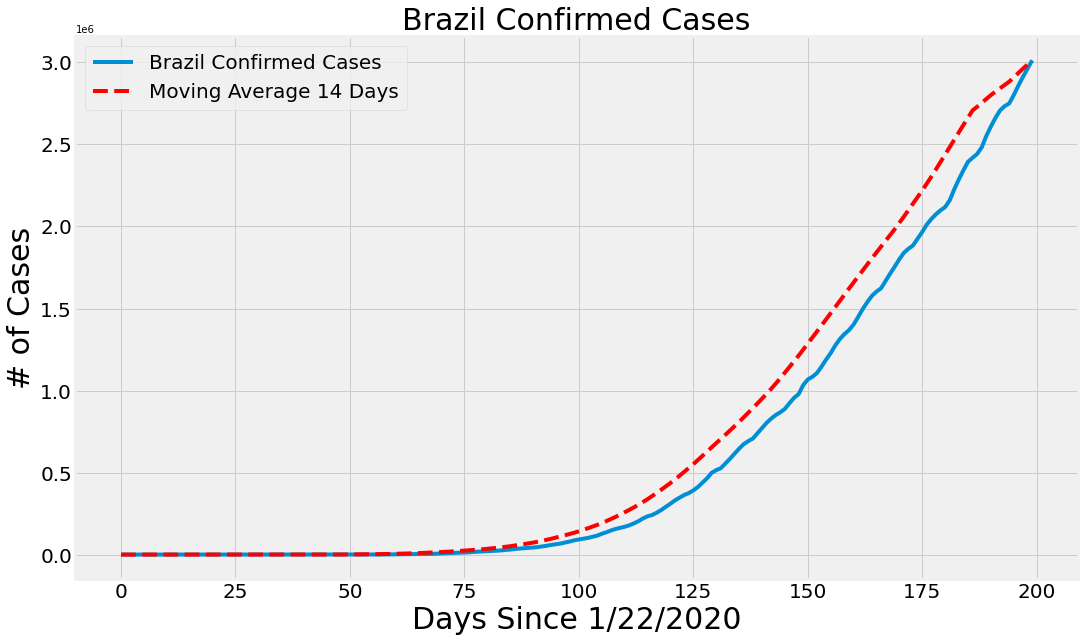

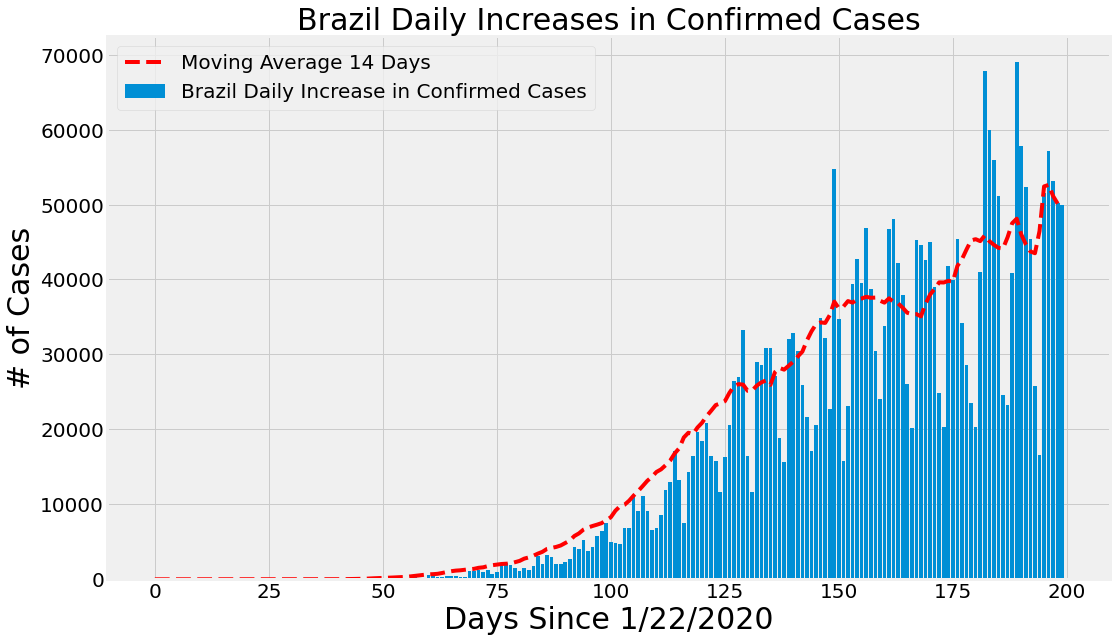

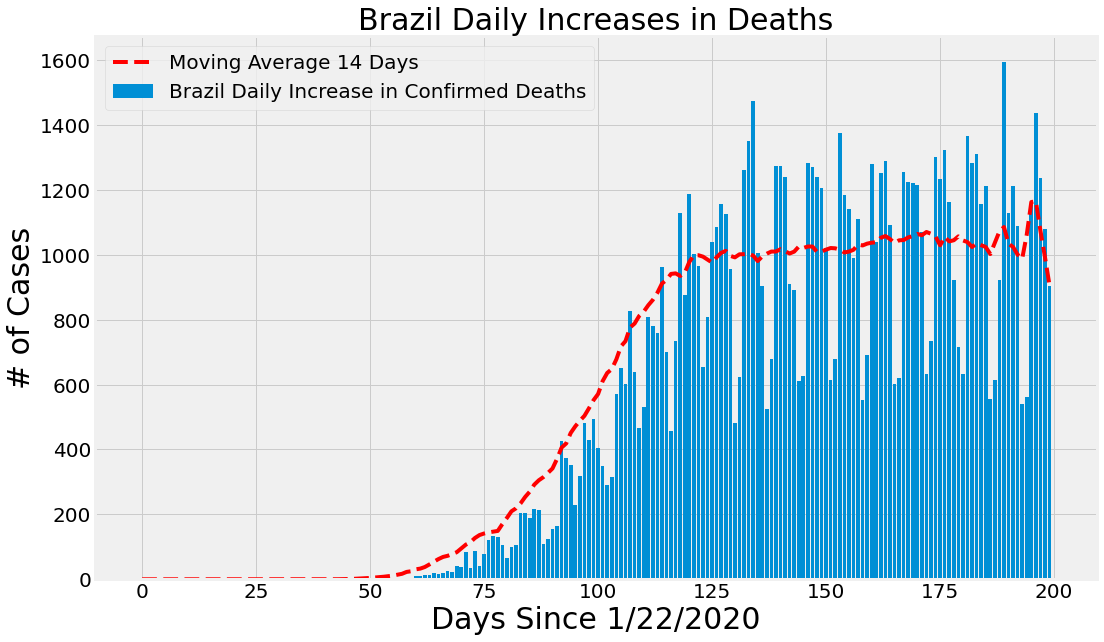

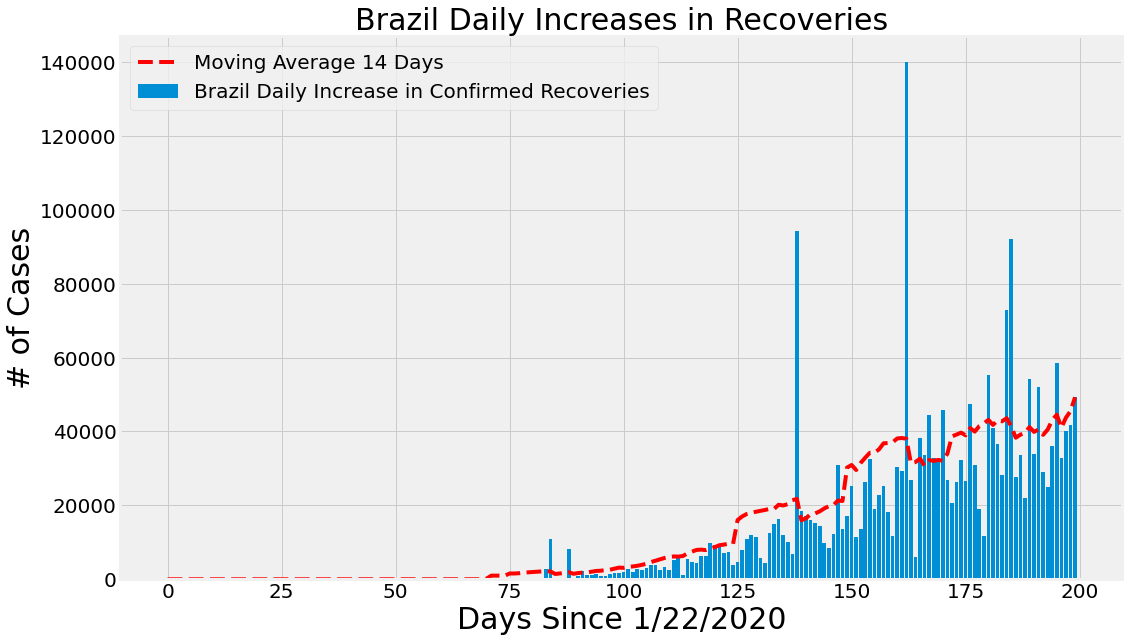

In [58]:
country_plot(adjusted_dates, brazil_cases, brazil_daily_increase, brazil_daily_death, brazil_daily_recovery, 'Brazil')

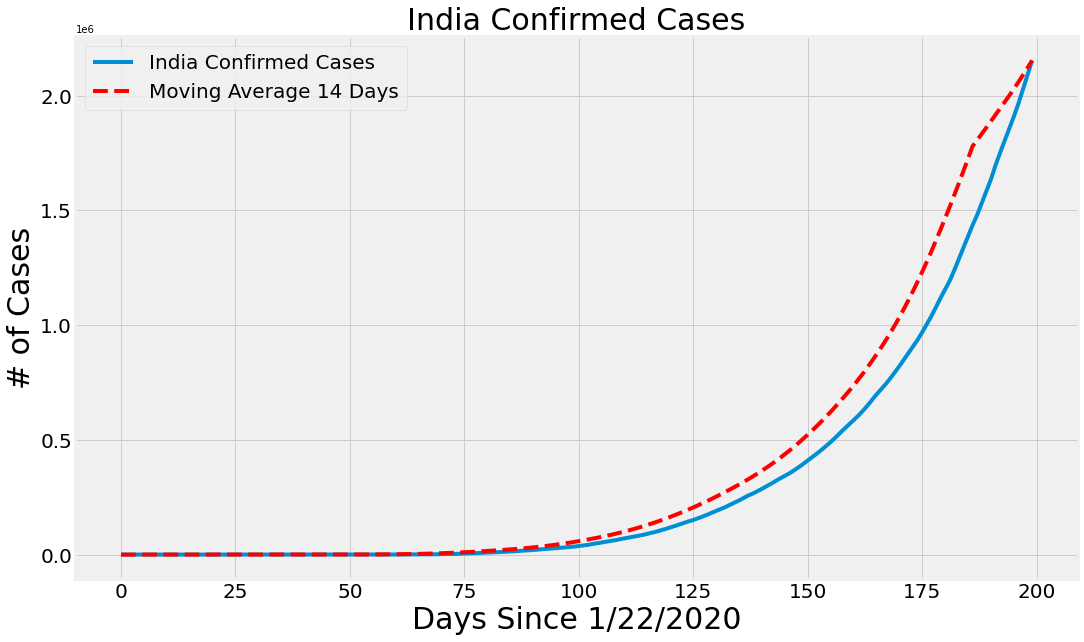

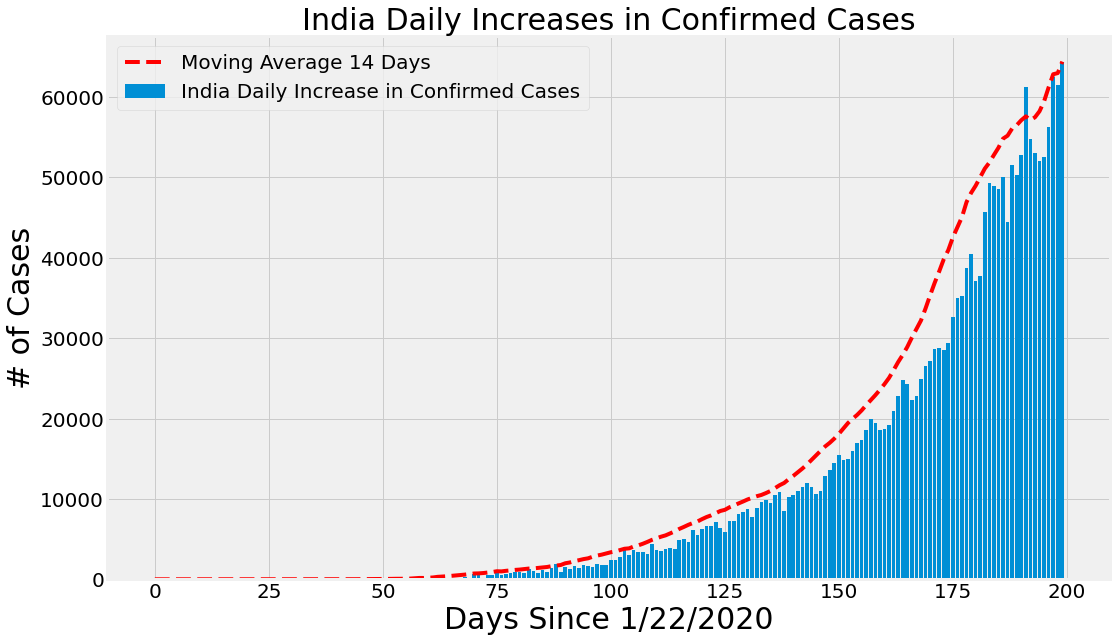

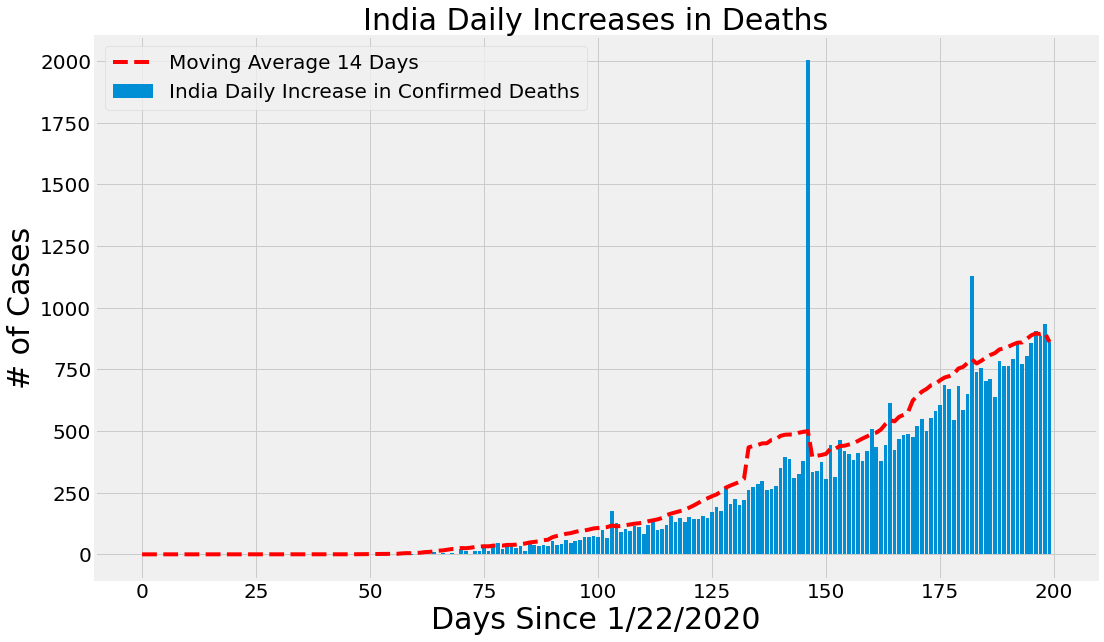

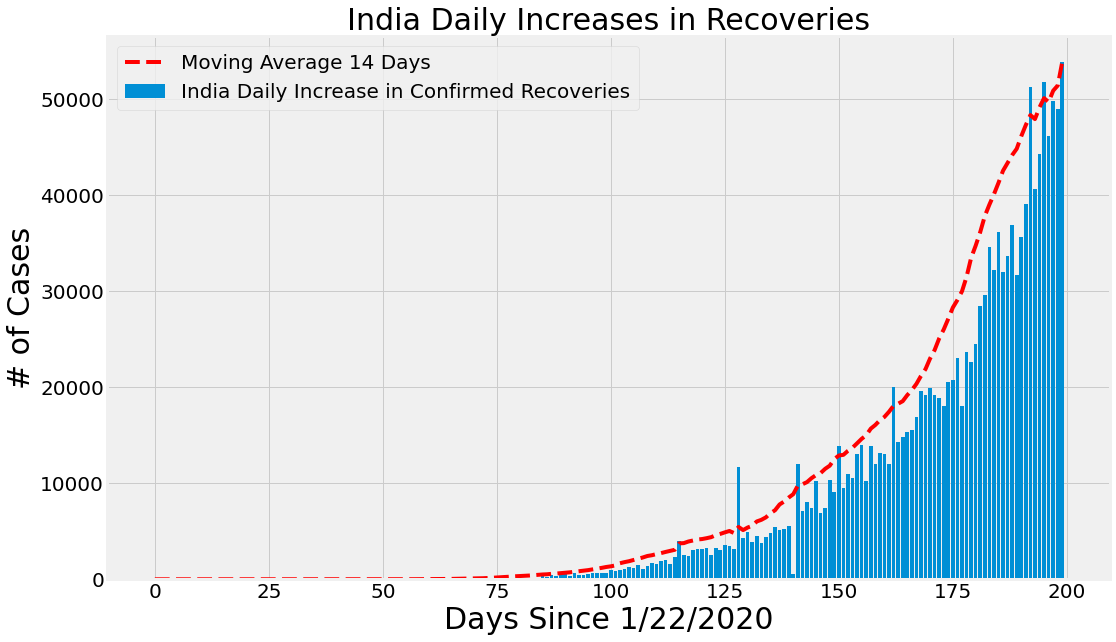

In [59]:
country_plot(adjusted_dates, india_cases, india_daily_increase, india_daily_death, india_daily_recovery, 'India')

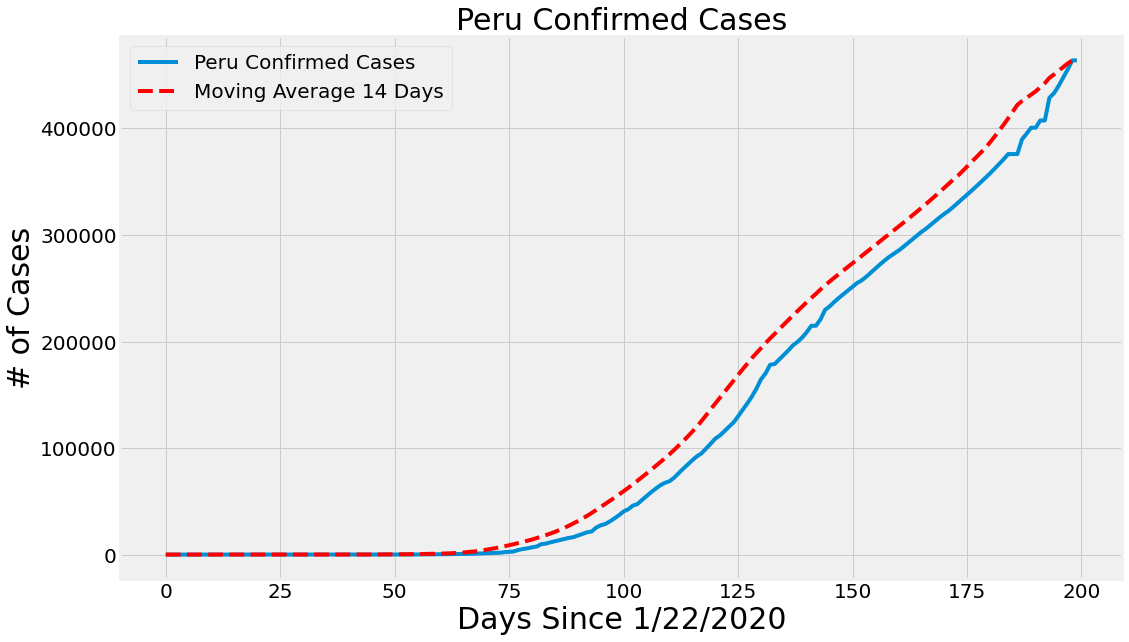

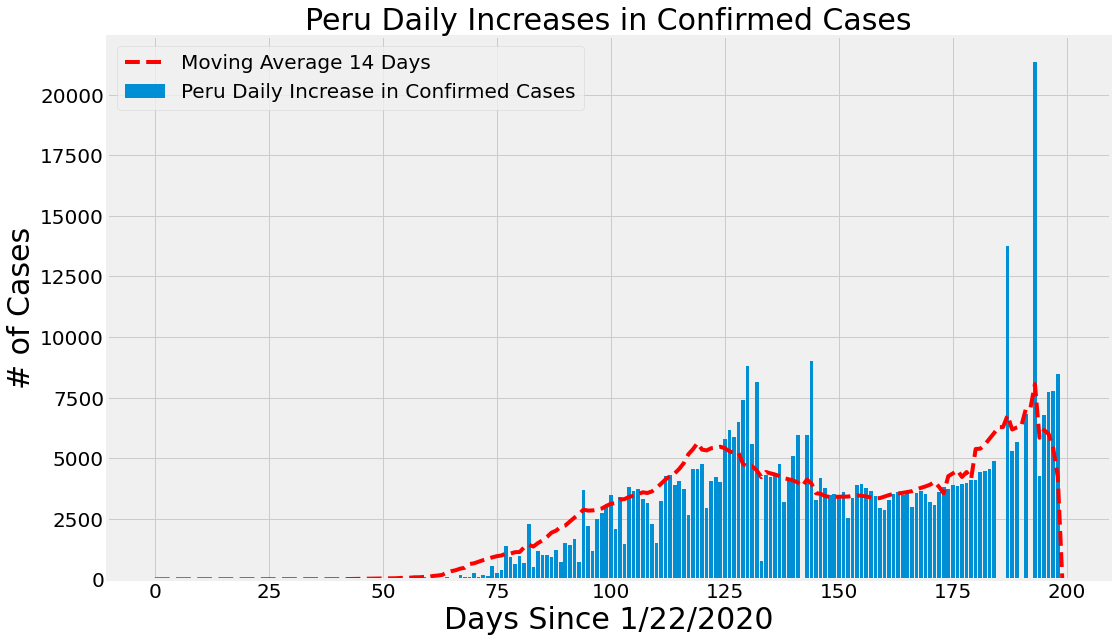

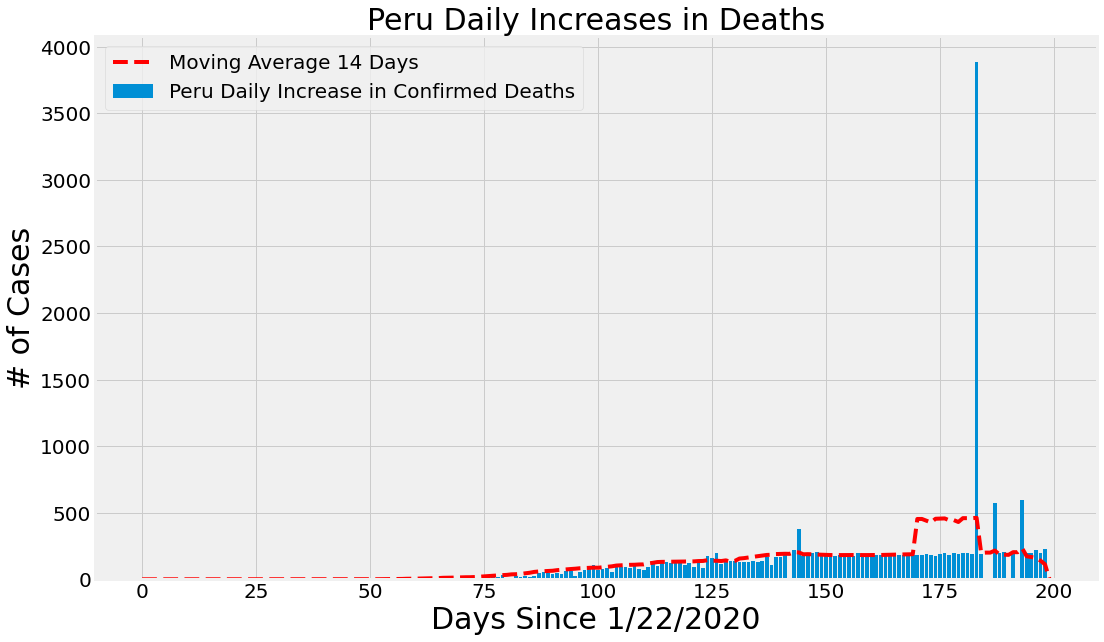

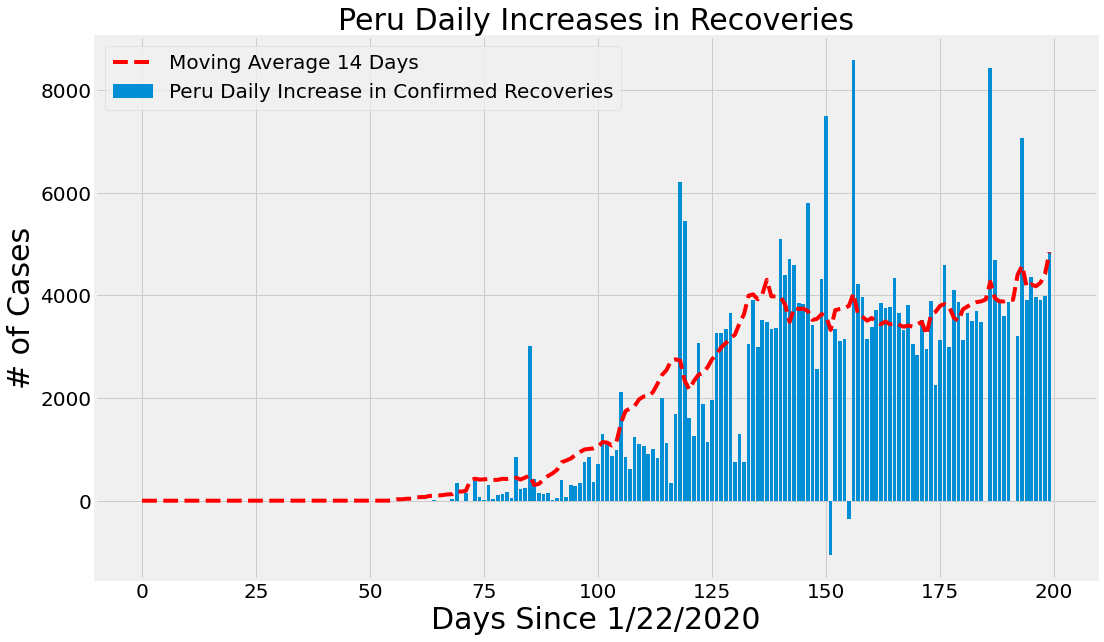

In [60]:
country_plot(adjusted_dates, peru_cases, peru_daily_increase, peru_daily_death, peru_daily_recovery, 'Peru')

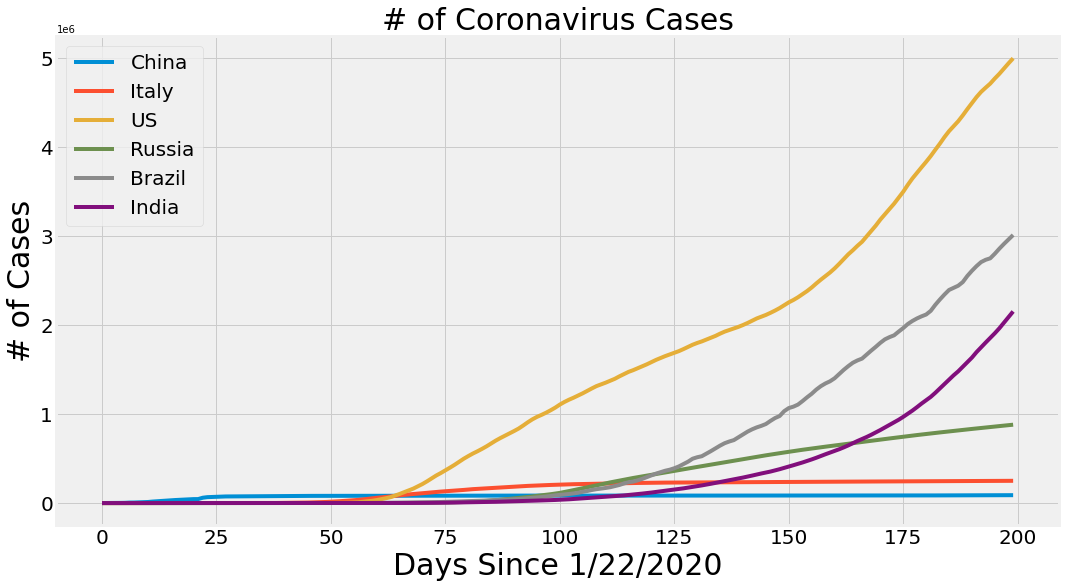

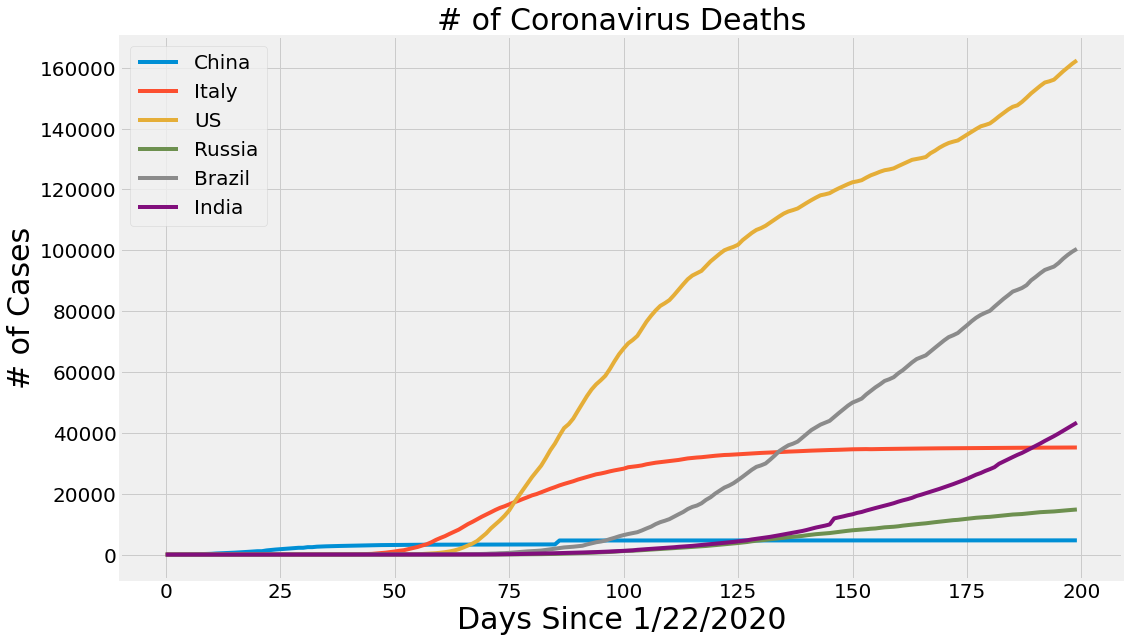

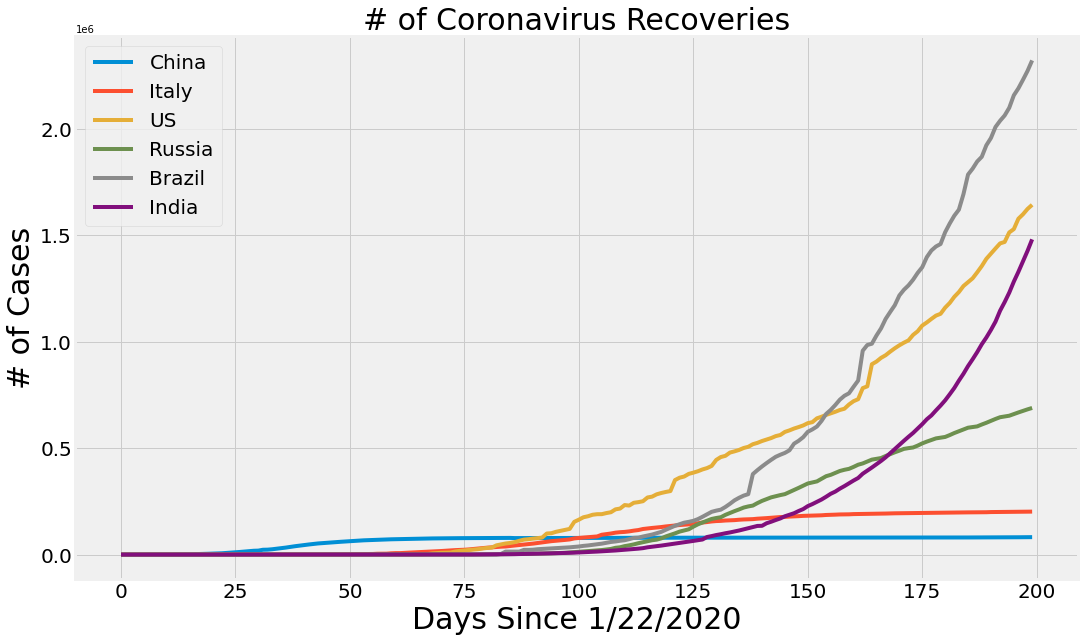

In [61]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, china_cases)
plt.plot(adjusted_dates, italy_cases)
plt.plot(adjusted_dates, us_cases)
plt.plot(adjusted_dates, russia_cases)
plt.plot(adjusted_dates, brazil_cases)
plt.plot(adjusted_dates, india_cases)

plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, china_deaths)
plt.plot(adjusted_dates, italy_deaths)
plt.plot(adjusted_dates, us_deaths)
plt.plot(adjusted_dates, russia_deaths)
plt.plot(adjusted_dates, brazil_deaths)
plt.plot(adjusted_dates, india_deaths)

plt.title('# of Coronavirus Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, china_recoveries)
plt.plot(adjusted_dates, italy_recoveries)
plt.plot(adjusted_dates, us_recoveries)
plt.plot(adjusted_dates, russia_recoveries)
plt.plot(adjusted_dates, brazil_recoveries)
plt.plot(adjusted_dates, india_recoveries)

plt.title('# of Coronavirus Recoveries', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['China', 'Italy', 'US', 'Russia', 'Brazil', 'India'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [62]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide
<a id='prediction'></a>

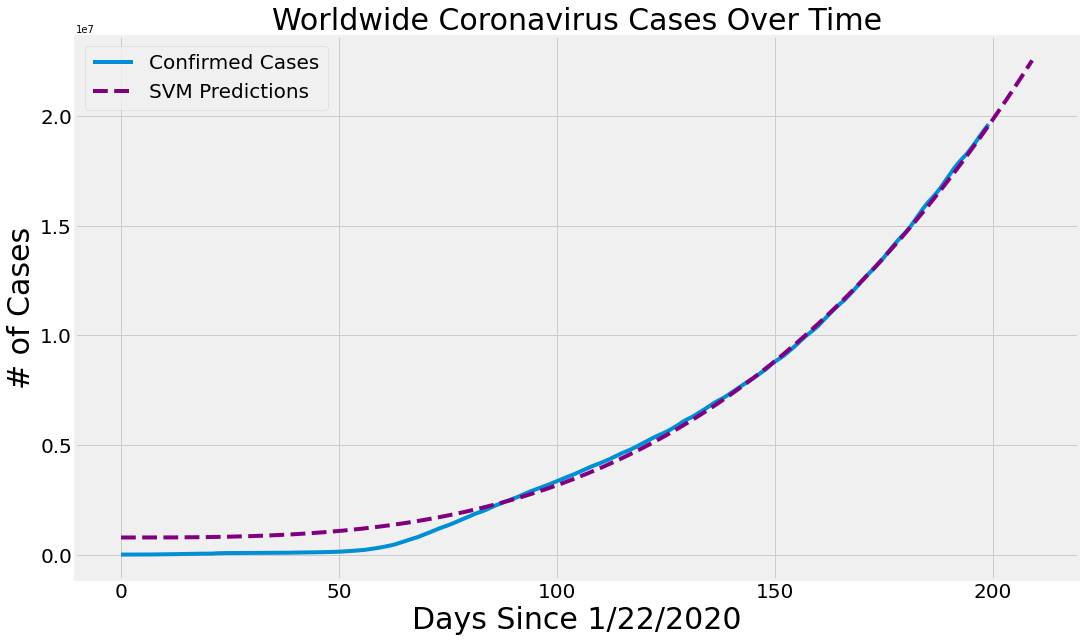

In [63]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

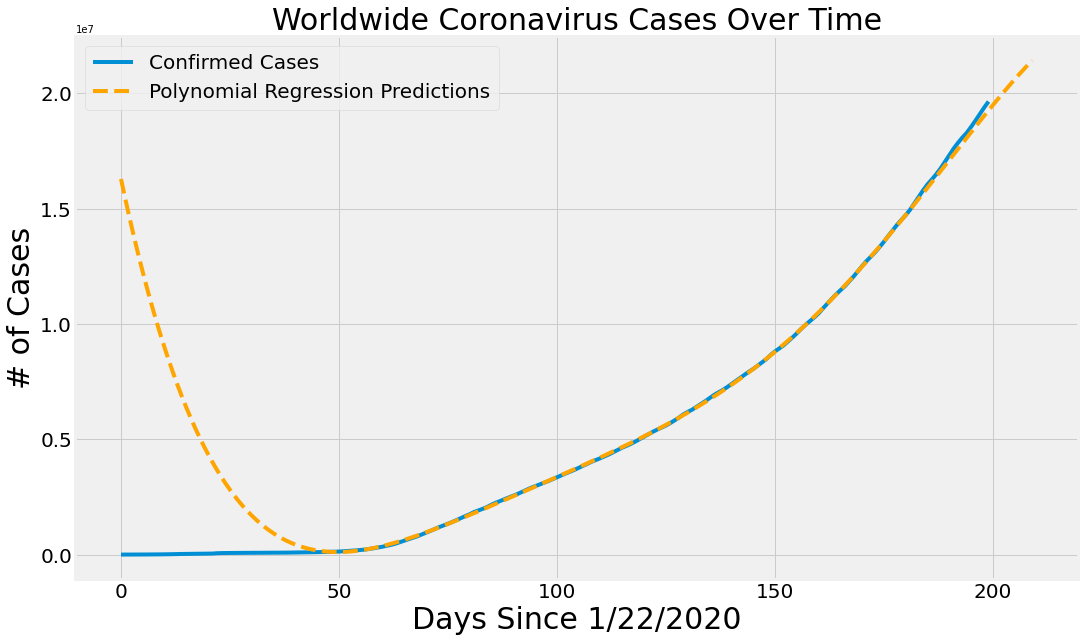

In [64]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

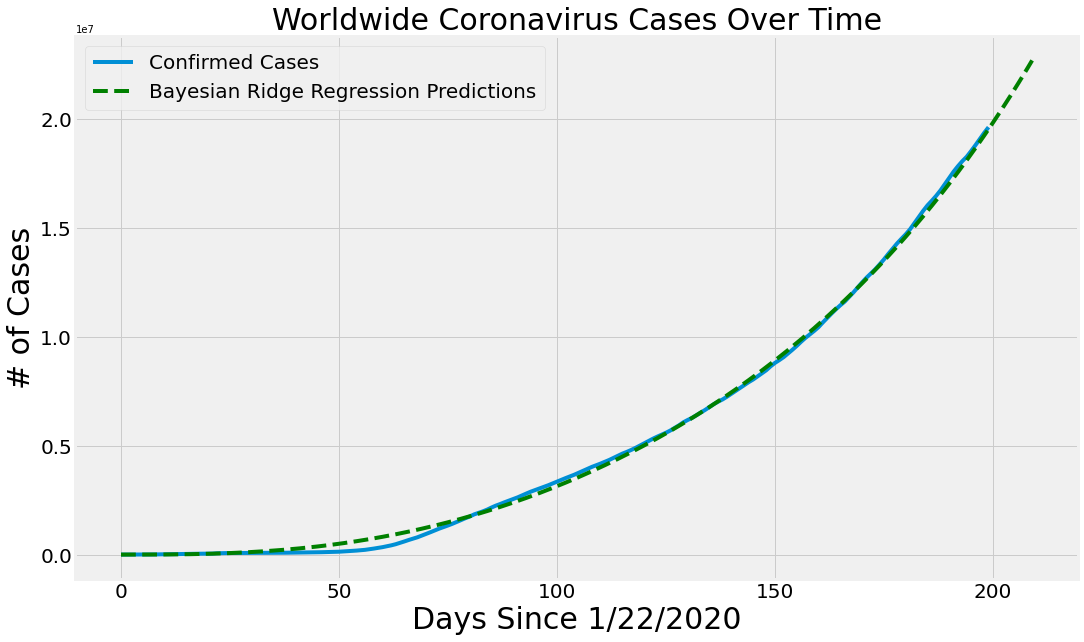

In [65]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [66]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df

Date  SVM Predicted # of Confirmed Cases Worldwide
0  08/09/2020                                    19857668.0
1  08/10/2020                                    20145258.0
2  08/11/2020                                    20435724.0
3  08/12/2020                                    20729080.0
4  08/13/2020                                    21025341.0
5  08/14/2020                                    21324520.0
6  08/15/2020                                    21626633.0
7  08/16/2020                                    21931693.0
8  08/17/2020                                    22239714.0
9  08/18/2020                                    22550712.0

In [67]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
svm_df

Date  Polynomial Predicted # of Confirmed Cases Worldwide
0  08/09/2020                                         19485211.0  
1  08/10/2020                                         19714151.0  
2  08/11/2020                                         19940374.0  
3  08/12/2020                                         20163577.0  
4  08/13/2020                                         20383451.0  
5  08/14/2020                                         20599673.0  
6  08/15/2020                                         20811914.0  
7  08/16/2020                                         21019832.0  
8  08/17/2020                                         21223077.0  
9  08/18/2020                                         21421288.0

In [68]:
# Future predictions using Bayesian Ridge 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
svm_df

Date  Bayesian Ridge Predicted # of Confirmed Cases Worldwide
0  08/09/2020                                         19842875.0      
1  08/10/2020                                         20143776.0      
2  08/11/2020                                         20448841.0      
3  08/12/2020                                         20758136.0      
4  08/13/2020                                         21071729.0      
5  08/14/2020                                         21389686.0      
6  08/15/2020                                         21712077.0      
7  08/16/2020                                         22038972.0      
8  08/17/2020                                         22370441.0      
9  08/18/2020                                         22706557.0

Mortality Rate (worldwide) **susceptible to change **

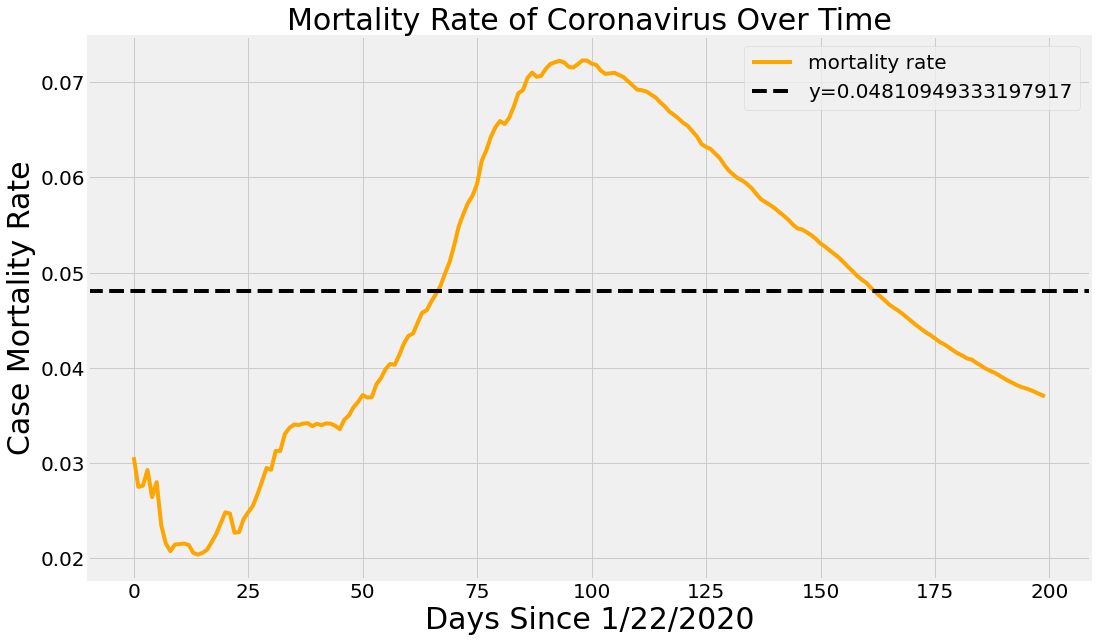

In [69]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Recovery Rate (worldwide) **suceptible to change **

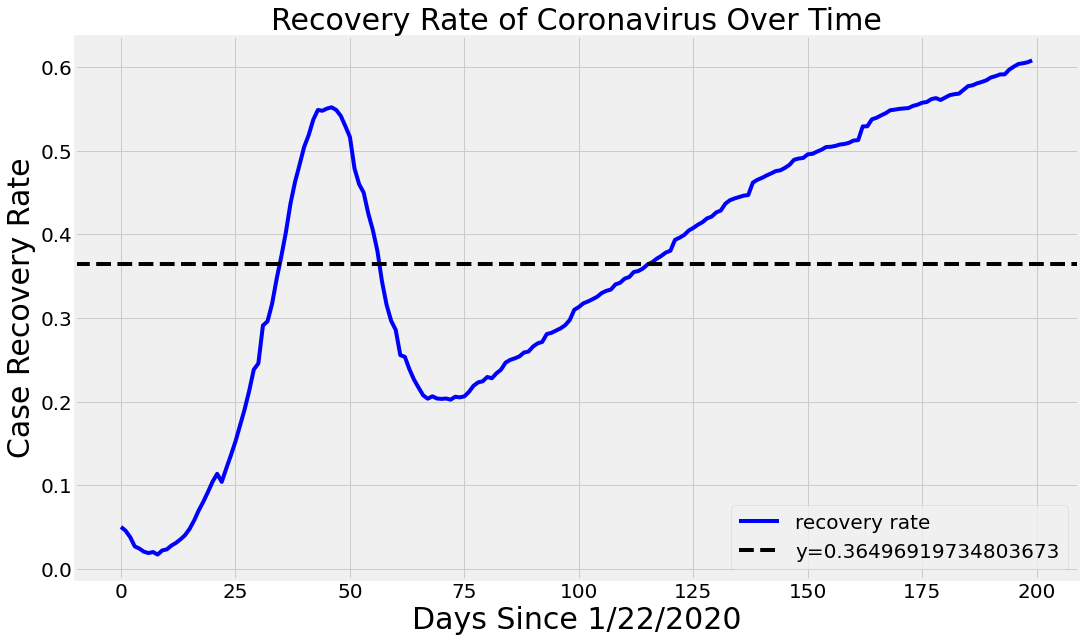

In [70]:
mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Graphing deaths against recoveries

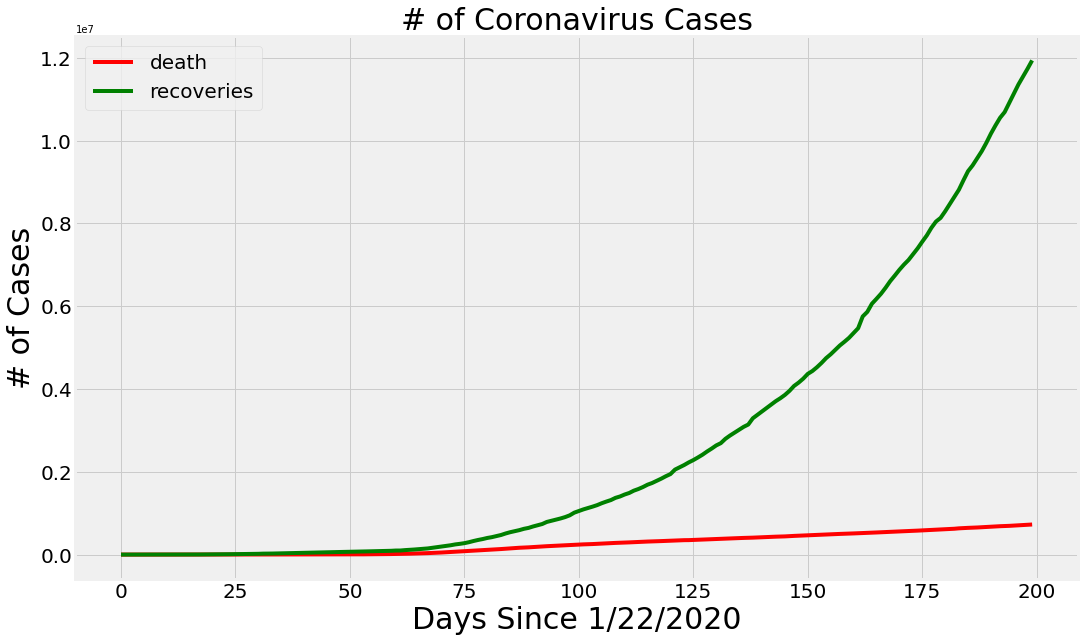

In [71]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Plotting the number of deaths against the number of recoveries

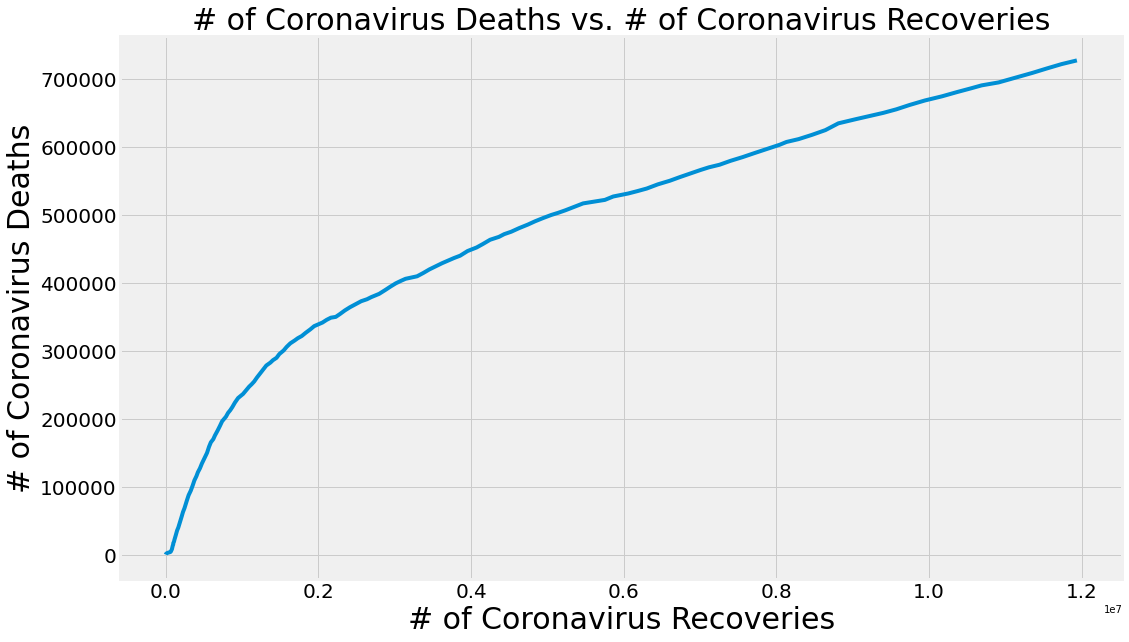

In [72]:
plt.figure(figsize=(16, 10))
plt.plot(total_recovered, total_deaths)
plt.title('# of Coronavirus Deaths vs. # of Coronavirus Recoveries', size=30)
plt.xlabel('# of Coronavirus Recoveries', size=30)
plt.ylabel('# of Coronavirus Deaths', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Getting information about countries/regions that have confirmed coronavirus cases

In [73]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [74]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirmed_cases[i] - country_death_cases[i] - country_recovery_cases[i])
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Data table
<a id='data_table'></a>

In [75]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': country_confirmed_cases,
                          'Number of Deaths': country_death_cases, 'Number of Recoveries' : country_recovery_cases, 
                          'Number of Active Cases' : country_active_cases,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Greens')

In [76]:
unique_provinces =  list(latest_data['Province_State'].unique())

Getting the latest information about provinces/states that have confirmed coronavirus cases

In [77]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
province_recovery_cases = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [78]:
# number of cases per province/state/city top 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:100], 'Country': province_country[:100], 'Number of Confirmed Cases': province_confirmed_cases[:100],
                          'Number of Deaths': province_death_cases[:100], 'Number of Recoveries' : province_recovery_cases[:100],
                          'Mortality Rate': province_mortality_rate[:100]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Greens')

In [79]:
nan_indices = [] 

# handle nan if there is any, it is usually a float: float('nan')

for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indices.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indices:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

<a id='bar_charts'></a>
# Bar Chart Visualizations for COVID-19

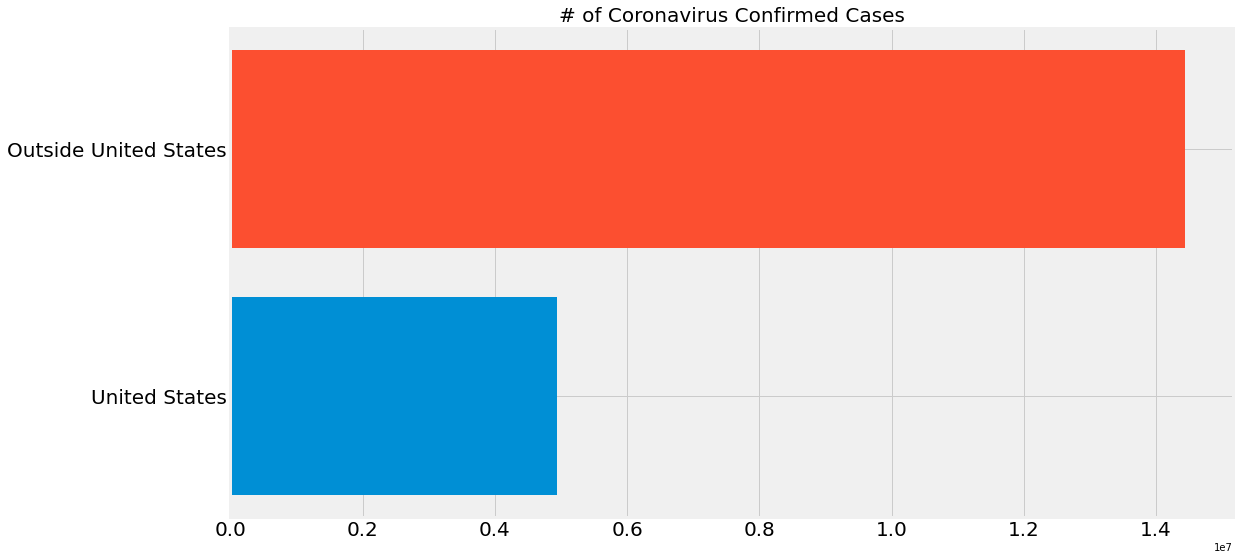

In [80]:
us_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = np.sum(country_confirmed_cases) - us_confirmed
plt.figure(figsize=(16, 9))
plt.barh('United States', us_confirmed)
plt.barh('Outside United States', outside_us_confirmed)
plt.title('# of Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [81]:
print('Outside United States {} cases:'.format(outside_us_confirmed))
print('United States {} cases'.format(us_confirmed))
print('Total: {} cases'.format(us_confirmed+outside_us_confirmed))

Outside United States 14436281 cases:
United States 4941755 cases
Total: 19378036 cases


In [82]:
# Only show 15 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[15:])

for i in range(len(country_confirmed_cases[:15])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

***Visual Representations*** (bar charts and pie charts)

In [83]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(19, 18))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

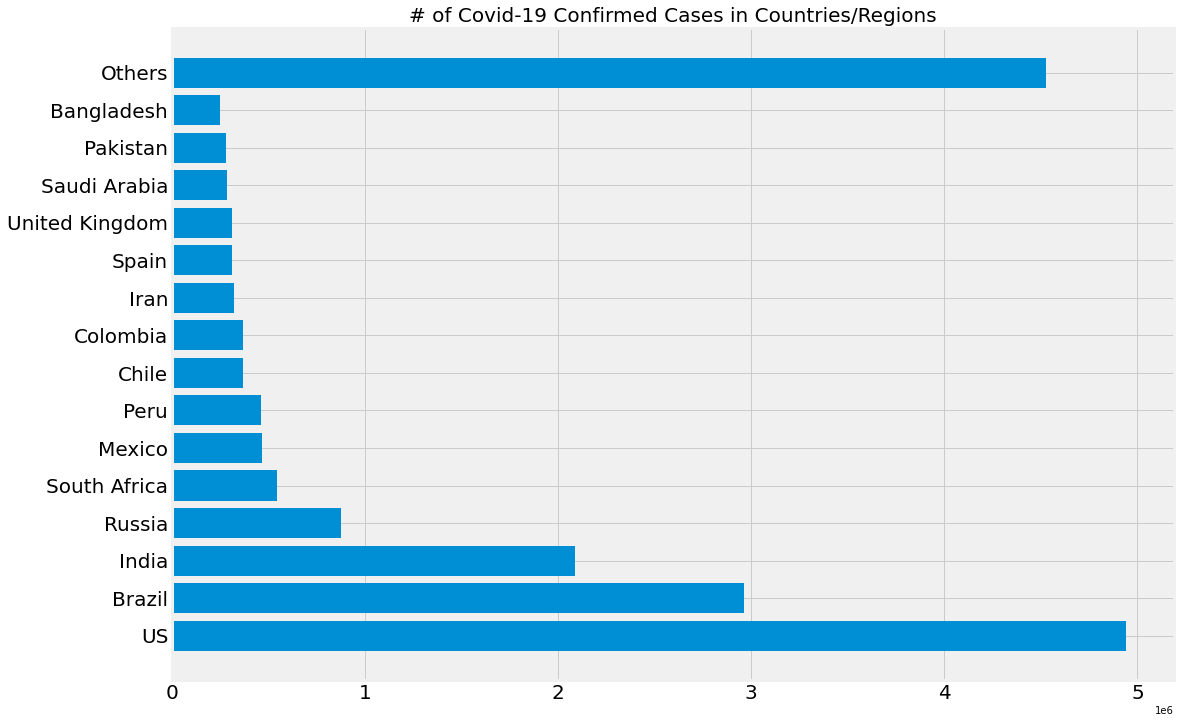

In [84]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

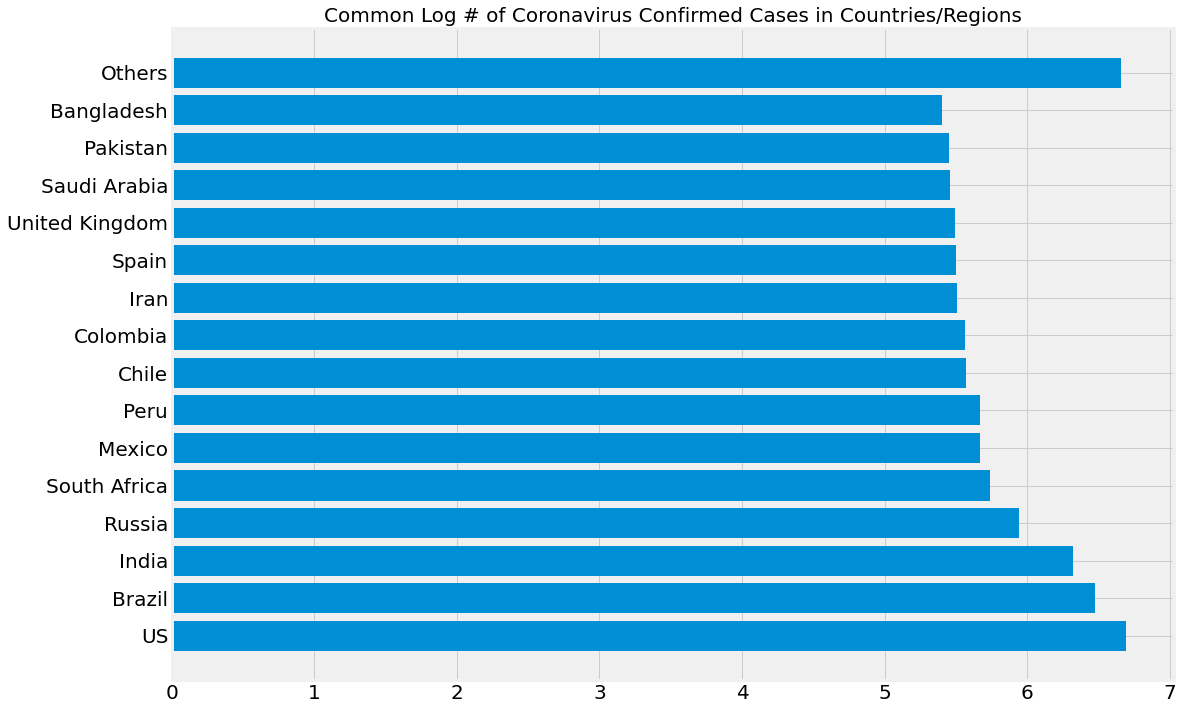

In [85]:
log_country_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases]
plot_bar_graphs(visual_unique_countries, log_country_confirmed_cases, 'Common Log # of Coronavirus Confirmed Cases in Countries/Regions')

In [86]:
# Only show 15 provinces with the most confirmed cases, the rest are grouped into the other category
visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[15:])
for i in range(len(province_confirmed_cases[:15])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

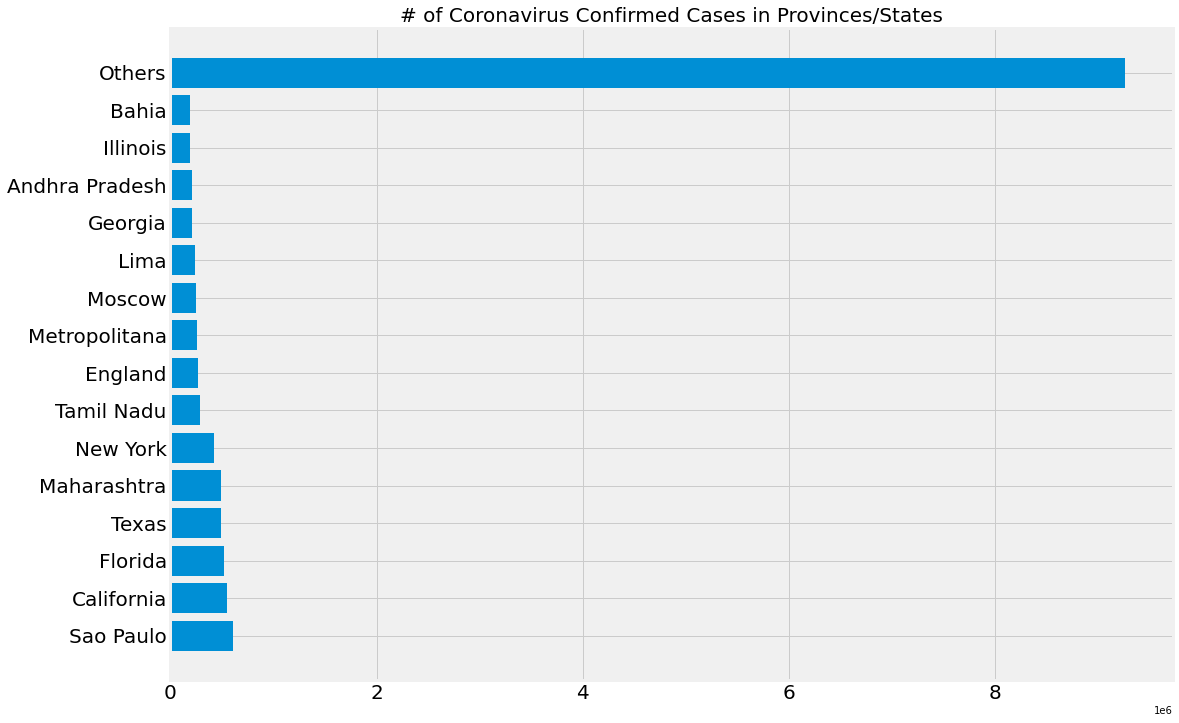

In [87]:
plot_bar_graphs(visual_unique_provinces, visual_confirmed_cases2, '# of Coronavirus Confirmed Cases in Provinces/States')

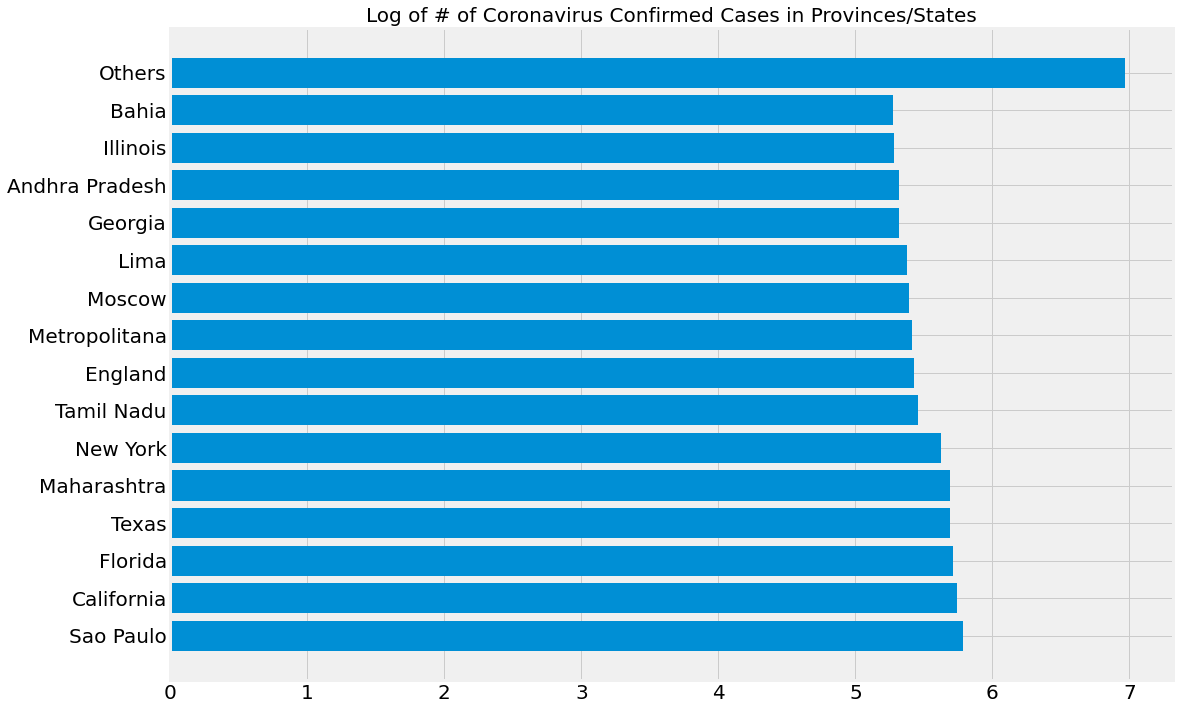

In [88]:
log_province_confirmed_cases = [math.log10(i) for i in visual_confirmed_cases2]
plot_bar_graphs(visual_unique_provinces, log_province_confirmed_cases, 'Log of # of Coronavirus Confirmed Cases in Provinces/States')

<a id='pie_charts'></a>
# Pie Chart Visualizations for COVID-19

In [89]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c)
    plt.legend(x, loc='best', fontsize=15)
    plt.show()

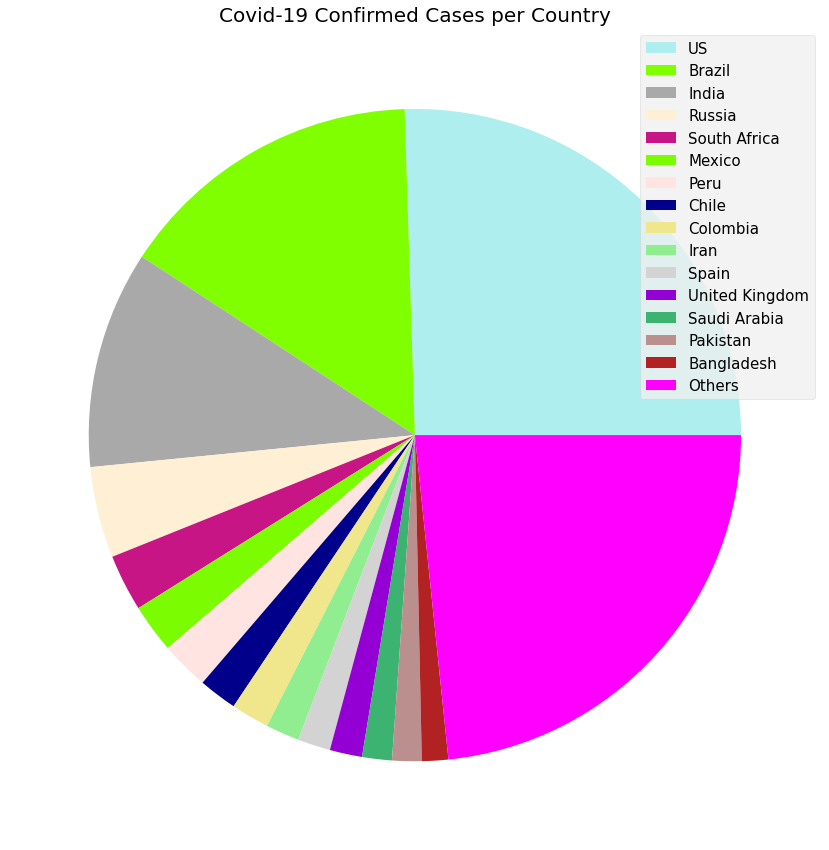

In [90]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

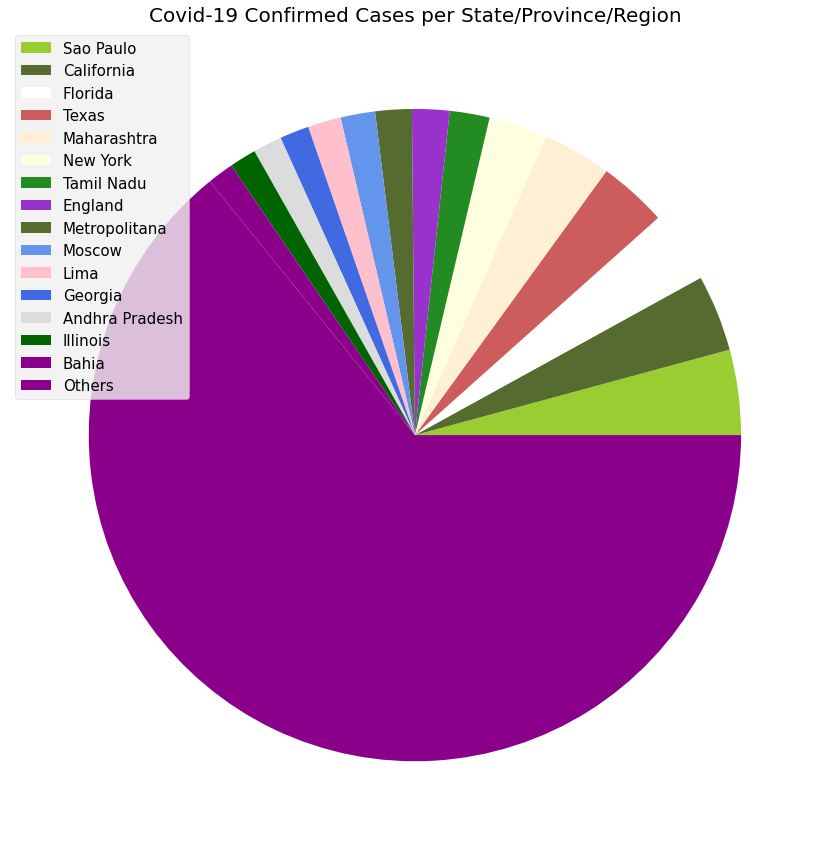

In [91]:
plot_pie_charts(visual_unique_provinces, visual_confirmed_cases2, 'Covid-19 Confirmed Cases per State/Province/Region')

In [92]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

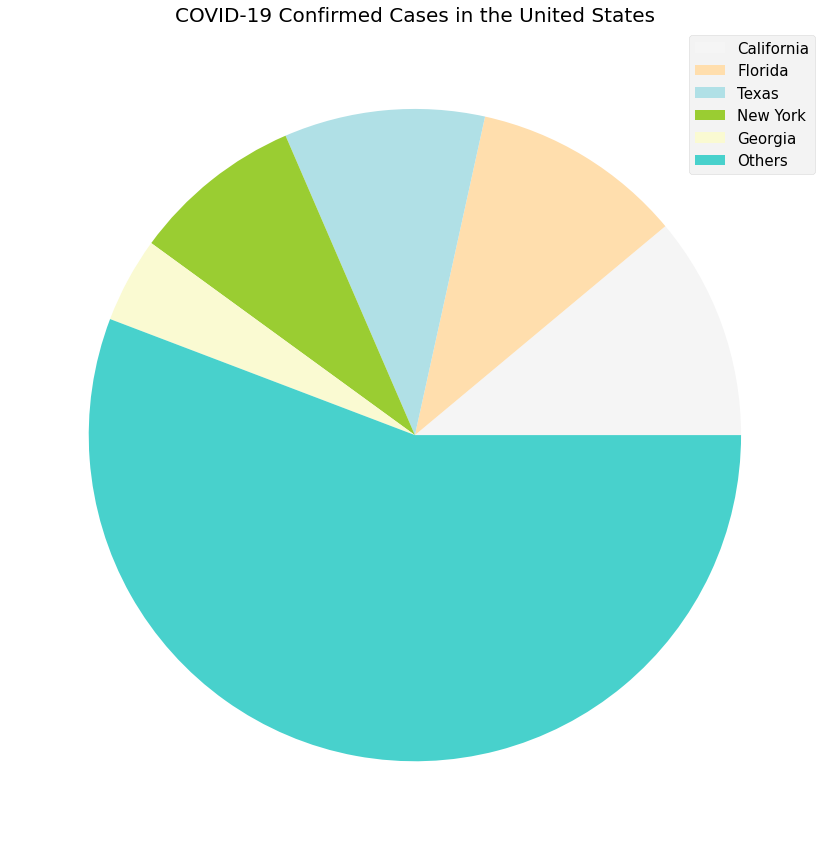

In [93]:
plot_pie_country_with_regions('US', 'COVID-19 Confirmed Cases in the United States')

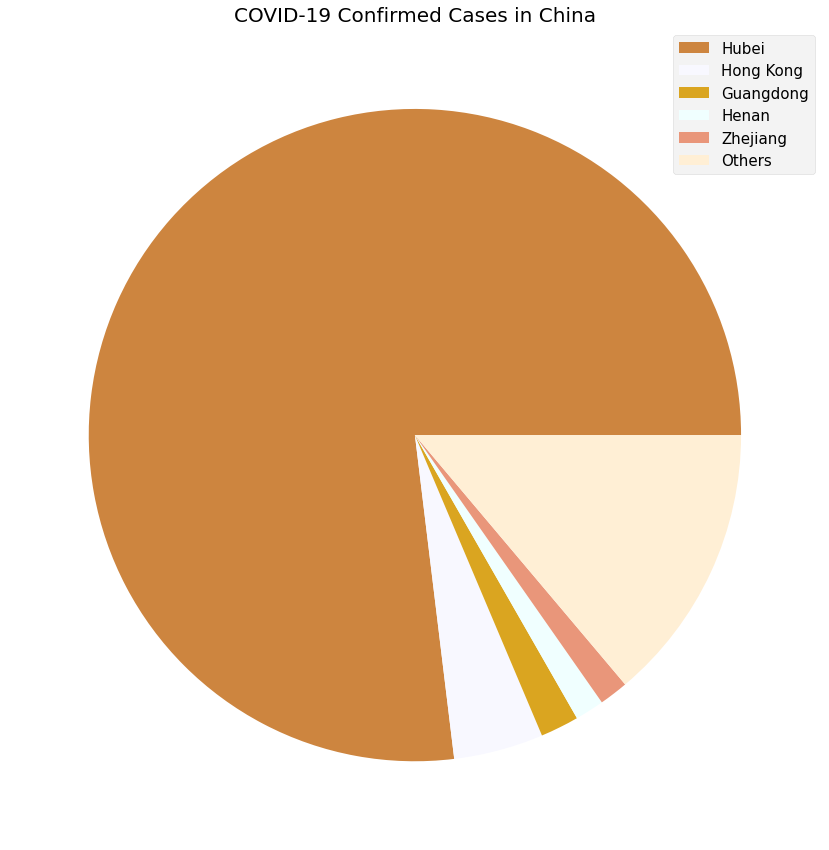

In [94]:
plot_pie_country_with_regions('China', 'COVID-19 Confirmed Cases in China')

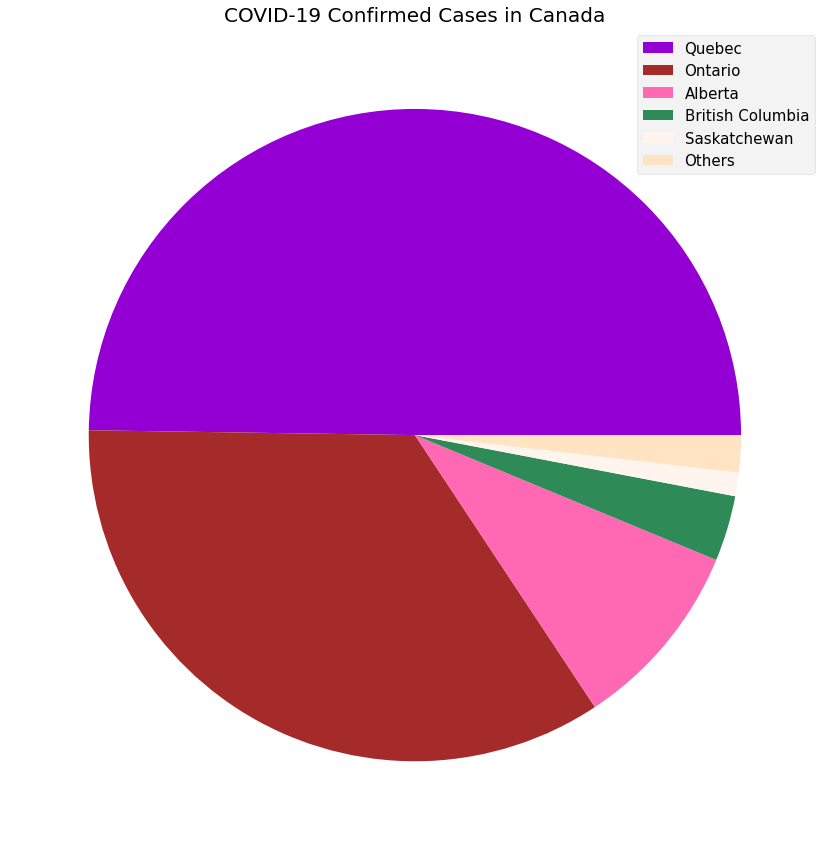

In [95]:
plot_pie_country_with_regions('Canada', 'COVID-19 Confirmed Cases in Canada')

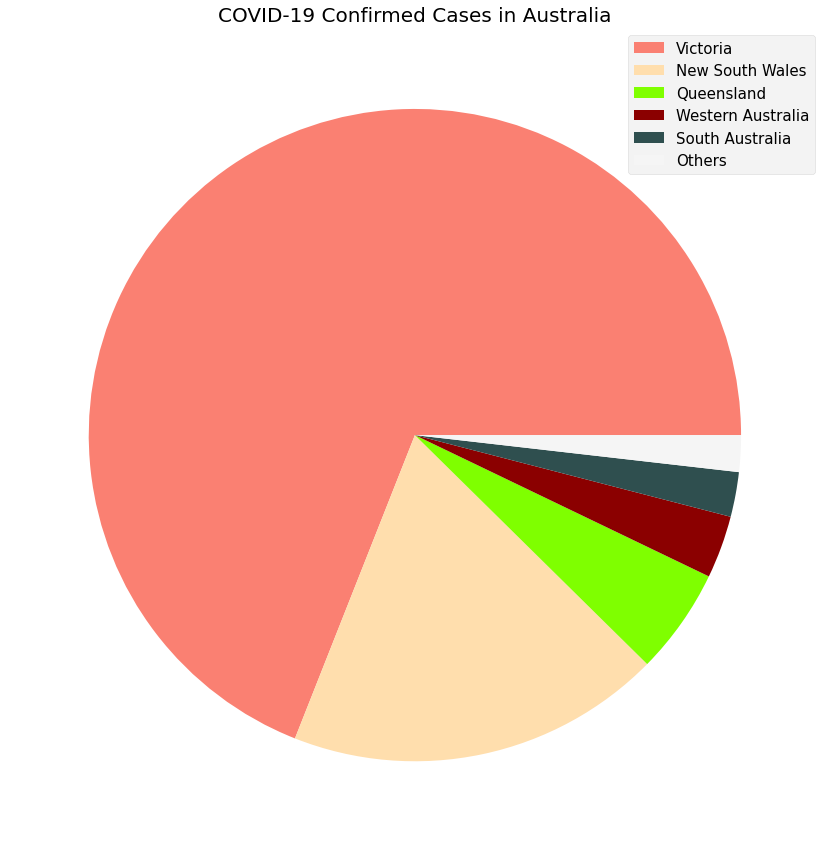

In [96]:
plot_pie_country_with_regions('Australia', 'COVID-19 Confirmed Cases in Australia')

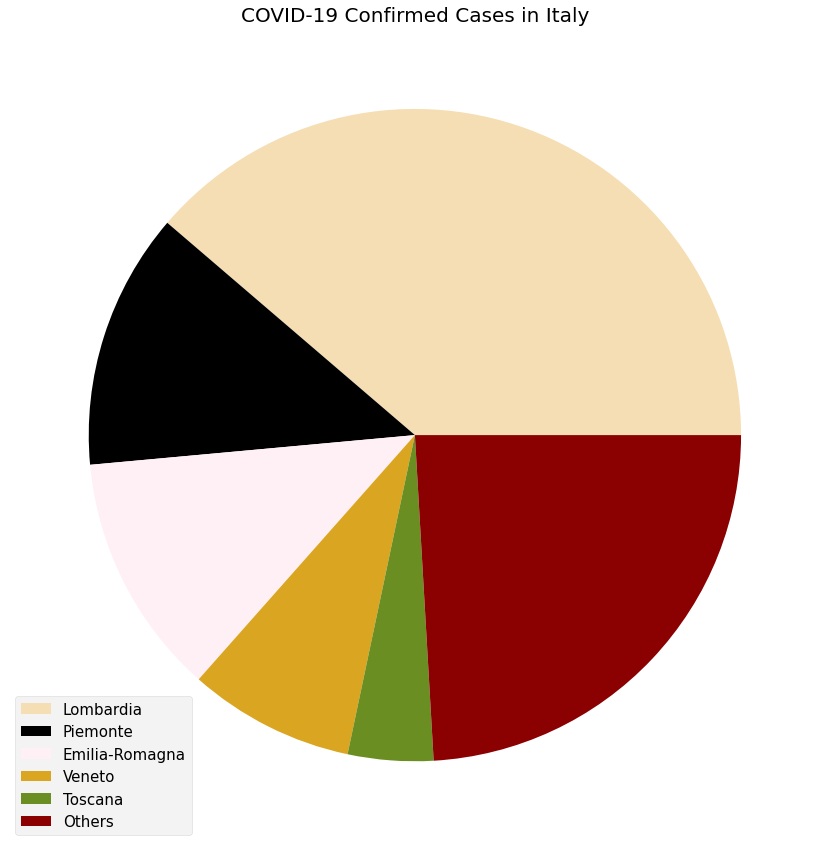

In [97]:
plot_pie_country_with_regions('Italy', 'COVID-19 Confirmed Cases in Italy')

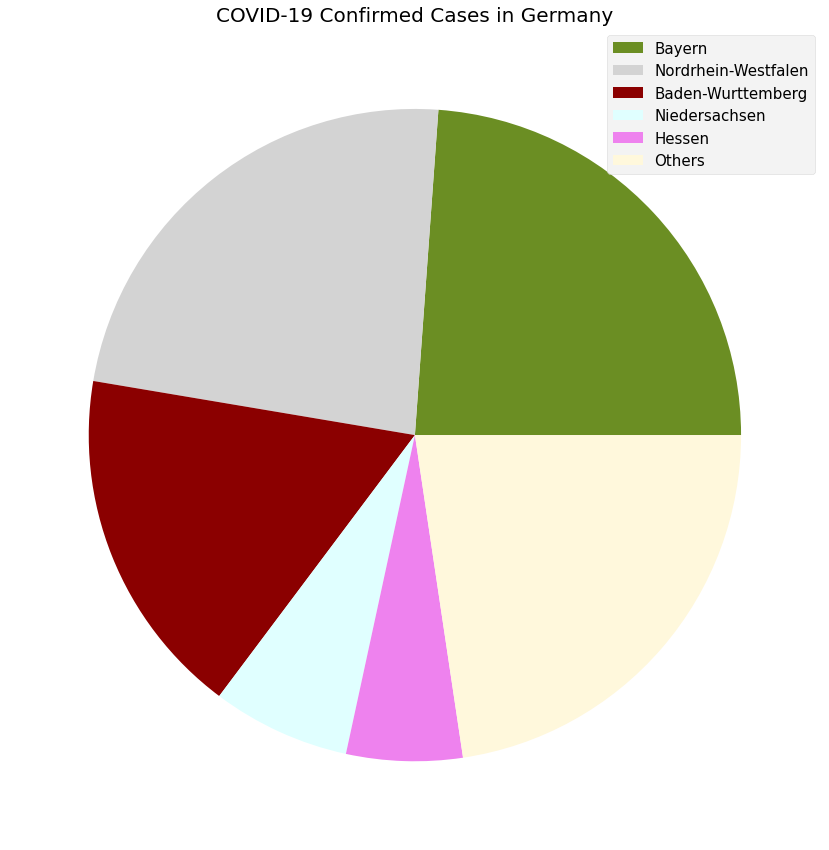

In [98]:
plot_pie_country_with_regions('Germany', 'COVID-19 Confirmed Cases in Germany')

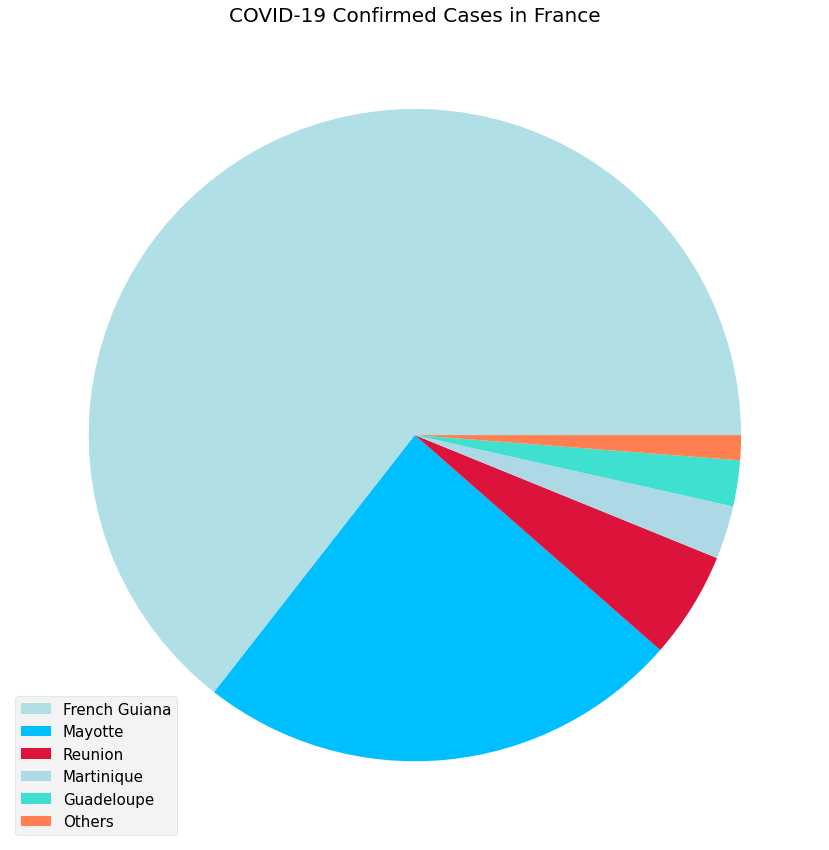

In [99]:
plot_pie_country_with_regions('France', 'COVID-19 Confirmed Cases in France')

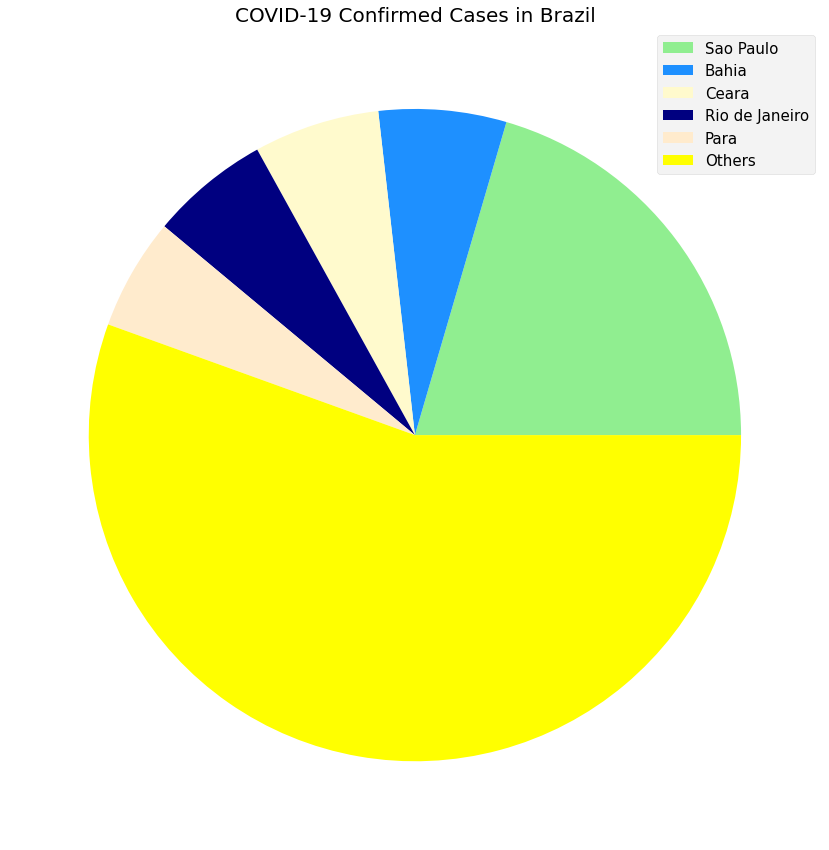

In [100]:
plot_pie_country_with_regions('Brazil', 'COVID-19 Confirmed Cases in Brazil')

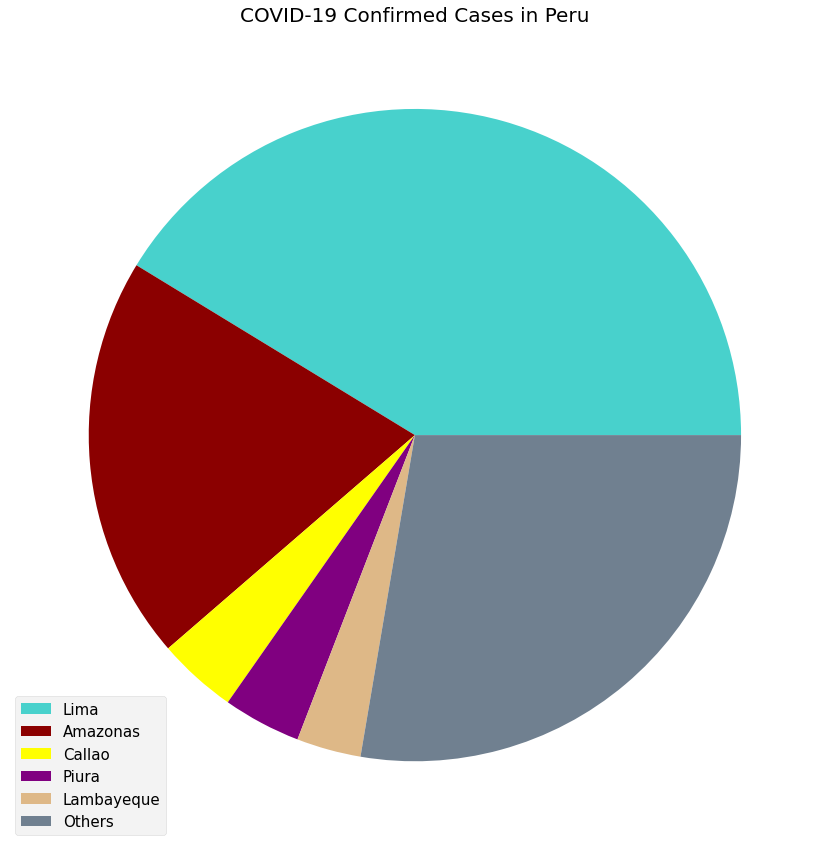

In [101]:
plot_pie_country_with_regions('Peru', 'COVID-19 Confirmed Cases in Peru')

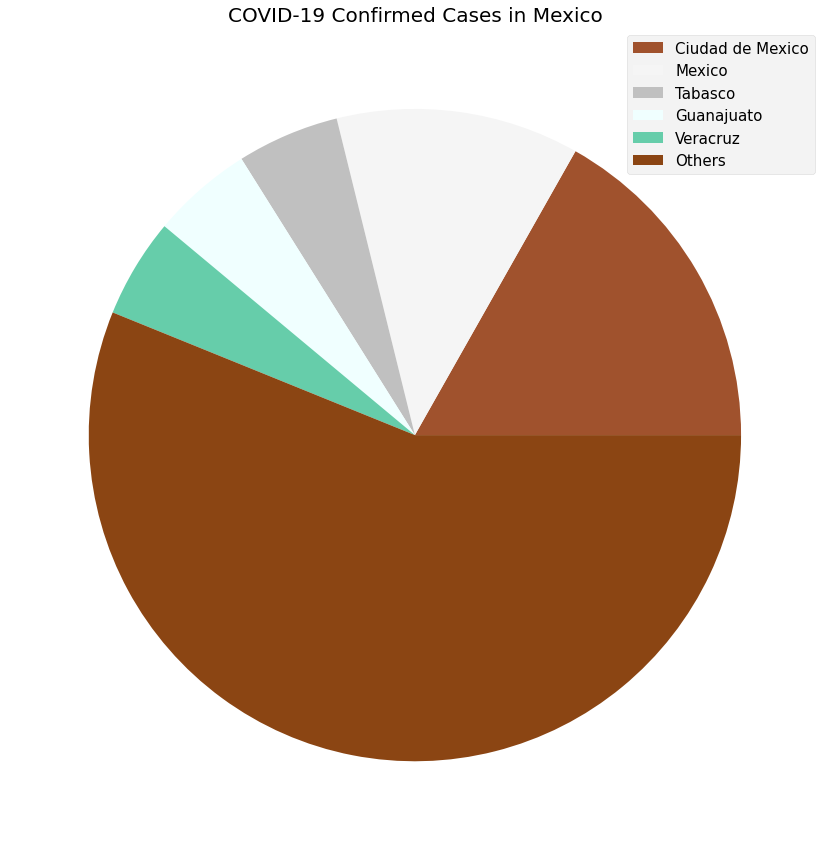

In [102]:
plot_pie_country_with_regions('Mexico', 'COVID-19 Confirmed Cases in Mexico')